In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/all_data_cleaned.csv', sep=';')
df.head(5)

Rock_number EC_rock Ph_rock Corg_rock (%) Ca_rock K_rock Mg_rock Na_rock  \
0            1    1351    8,11          0,05   22,24   0,16    3,09    0,15   
1            1    1351    8,11          0,05   22,24   0,16    3,09    0,15   
2            1    1351    8,11          0,05   22,24   0,16    3,09    0,15   
3            1    1351    8,11          0,05   22,24   0,16    3,09    0,15   
4            1    1351    8,11          0,05   22,24   0,16    3,09    0,15   

  SAR_rock SiO2_rock  ... Carbonate_leachate Sulfate_leachate  \
0     0,04     21,78  ...              8,831          442,281   
1     0,04     21,78  ...             4,4515         741,6574   
2     0,04     21,78  ...             3,4084         593,0435   
3     0,04     21,78  ...             3,7481         656,4315   
4     0,04     21,78  ...             4,1614         657,1826   

  Nitrate_leachate Phosphate_leachate Ca_leachate Fe_leachate K_leachate  \
0           0,8657             0,0828      106,60      12,310       0,49   
1           0,7168             0,3586      119,50      81,070       0,68   
2            0,477             0,0735      249,00      60,540       0,70   
3           0,7683             0,8399      127,60      58,770       0,63   
4           0,6421             0,1142      141,60      44,950       0,56   

  Mg_leachate Mn_leachate Na_leachate  
0        7,68        9,74       0,005  
1        8,00      718,10       0,005  
2        8,96      929,70       0,005  
3        6,85      606,60       0,005  
4        7,56      710,90       0,005  

[5 rows x 39 columns]

In [5]:
df.describe()

Rock_number  Event_quantity        Acid        Temp    Timestep
count   558.000000      558.000000  558.000000  558.000000  558.000000
mean      4.580645      139.569892    0.295699   15.994624    8.989247
std       1.844917       45.773754    0.456766   26.743444    5.287758
min       1.000000       45.000000    0.000000   -5.000000    1.000000
25%       4.000000      140.000000    0.000000   -5.000000    5.000000
50%       5.000000      150.000000    0.000000   -5.000000    9.000000
75%       6.000000      150.000000    1.000000   50.000000   13.000000
max       7.000000      200.000000    1.000000   50.000000   23.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rock_number         558 non-null    int64 
 1   EC_rock             558 non-null    object
 2   Ph_rock             558 non-null    object
 3   Corg_rock (%)       558 non-null    object
 4   Ca_rock             558 non-null    object
 5   K_rock              558 non-null    object
 6   Mg_rock             558 non-null    object
 7   Na_rock             558 non-null    object
 8   SAR_rock            558 non-null    object
 9   SiO2_rock           558 non-null    object
 10  Al2O3_rock          558 non-null    object
 11  Fe2O3_rock          558 non-null    object
 12  TiO2_rock           558 non-null    object
 13  MnO_rock            558 non-null    object
 14  CaO_rock            558 non-null    object
 15  MgO_rock            558 non-null    object
 16  Na2O_rock           558 no

In [7]:
for col in df.select_dtypes(include='object').columns:
    if col != 'Type_event':
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = df[col].replace('/', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 555
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rock_number         293 non-null    int64  
 1   EC_rock             293 non-null    float64
 2   Ph_rock             293 non-null    float64
 3   Corg_rock (%)       293 non-null    float64
 4   Ca_rock             293 non-null    float64
 5   K_rock              293 non-null    float64
 6   Mg_rock             293 non-null    float64
 7   Na_rock             293 non-null    float64
 8   SAR_rock            293 non-null    float64
 9   SiO2_rock           293 non-null    float64
 10  Al2O3_rock          293 non-null    float64
 11  Fe2O3_rock          293 non-null    float64
 12  TiO2_rock           293 non-null    float64
 13  MnO_rock            293 non-null    float64
 14  CaO_rock            293 non-null    float64
 15  MgO_rock            293 non-null    float64
 16  Na2O_rock    

In [10]:
unique_combinations = df[['Type_event', 'Rock_number', 'Temp', 'Acid']].drop_duplicates()

print(unique_combinations)

    Type_event  Rock_number  Temp  Acid
0         rain            1    -5     0
15        rain            1    50     0
23        snow            1    -5     0
38        snow            1    50     0
46        rain            2    -5     0
61        rain            2    50     0
69        snow            2    -5     0
84        snow            2    50     0
92        rain            3    -5     0
107       rain            3    50     0
115       snow            3    -5     0
130       snow            3    50     0
138       snow            4    -5     1
153       rain            4    50     1
168       rain            4    -5     1
183       rain            4    50     0
198       rain            4    -5     0
243       snow            4    -5     0
258       snow            5    -5     1
288       rain            5    -5     1
303       rain            5    50     0
318       rain            5    -5     0
363       snow            5    -5     0
408       rain            6    50     0


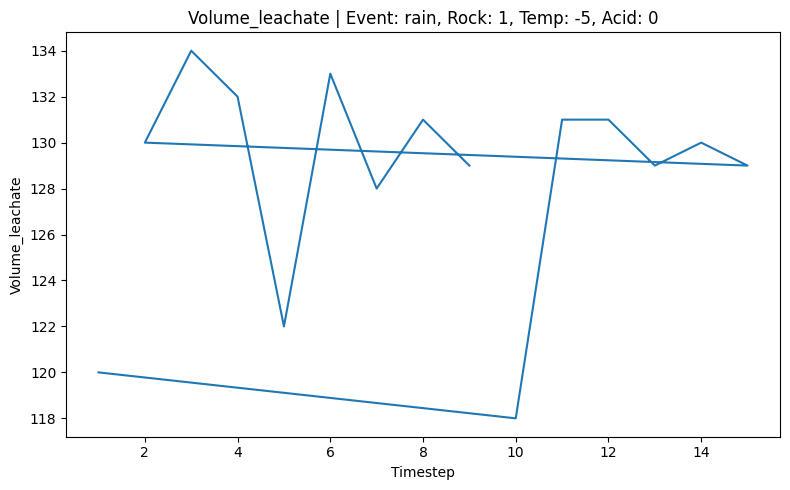

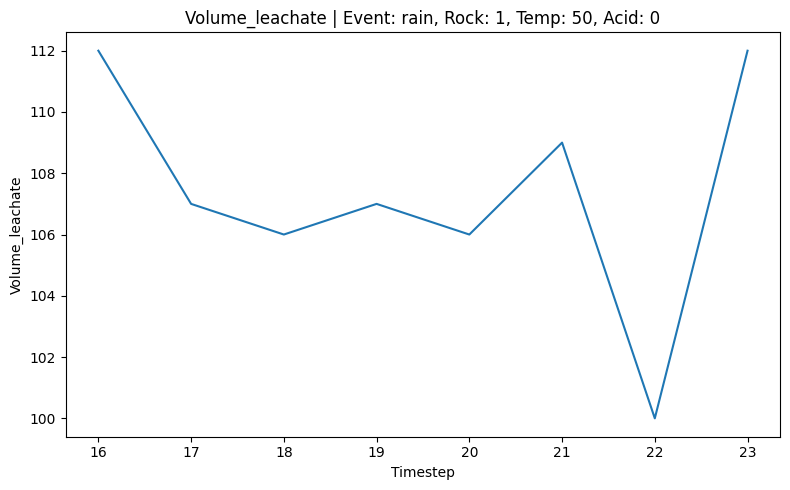

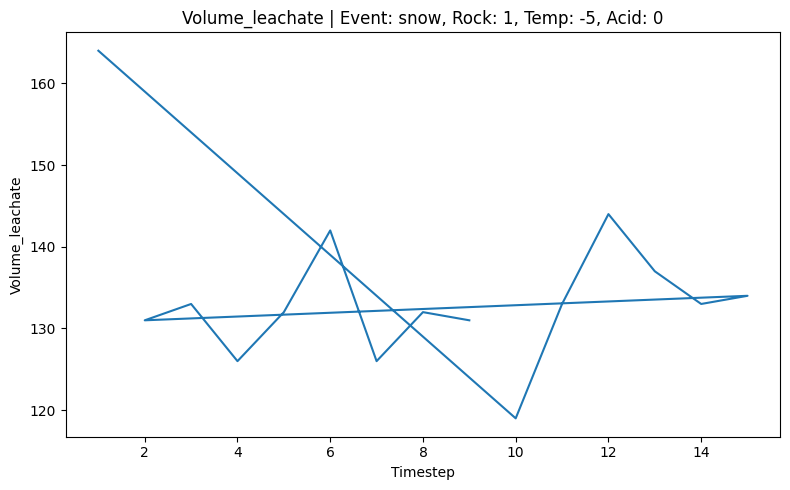

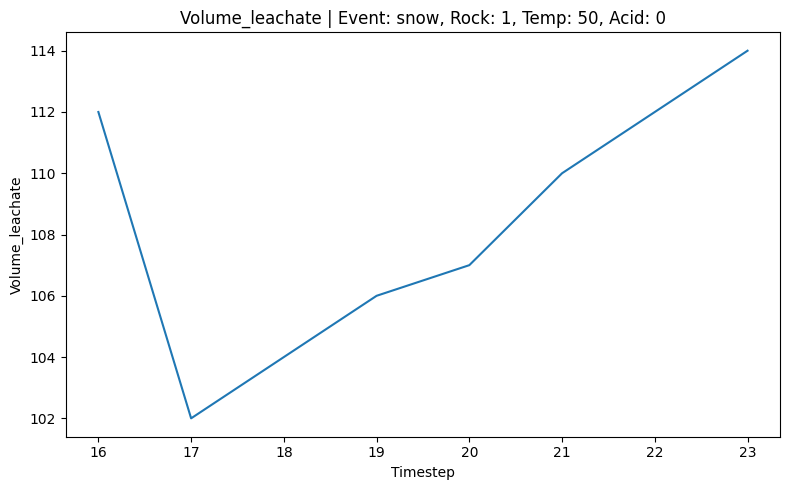

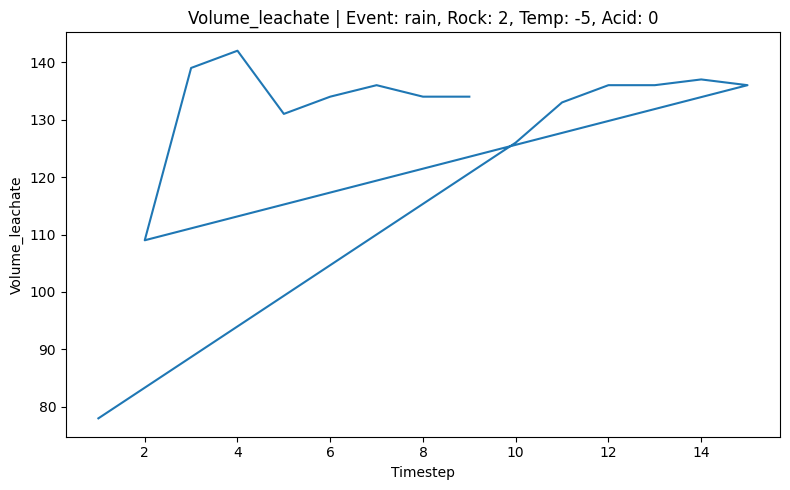

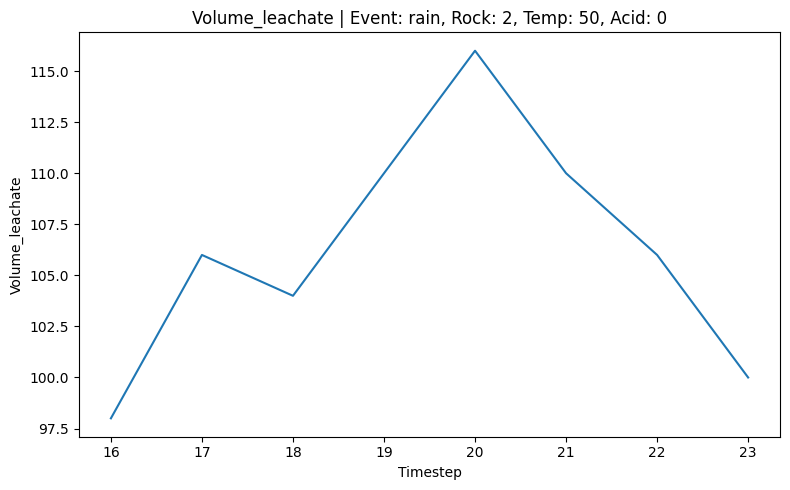

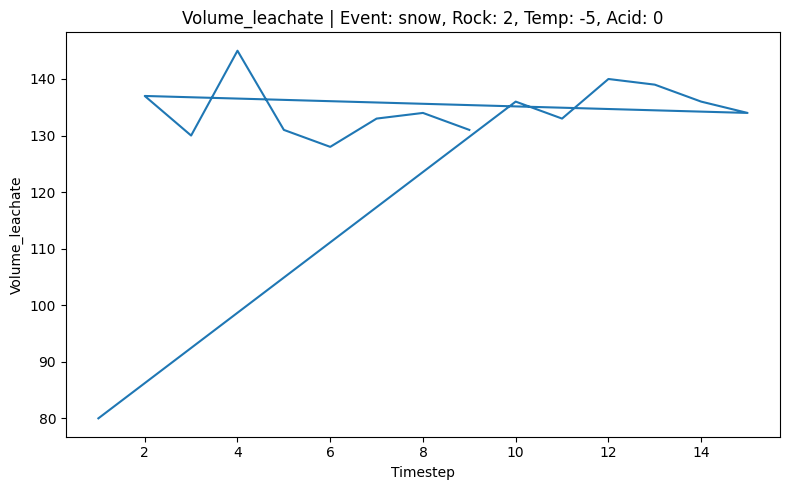

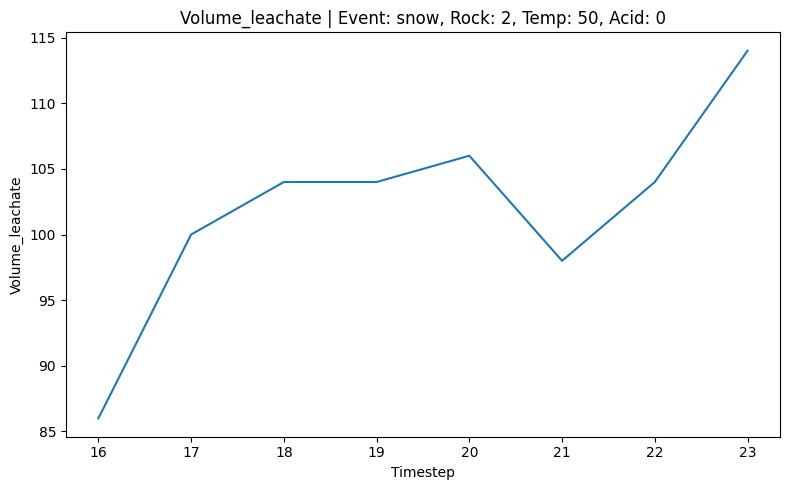

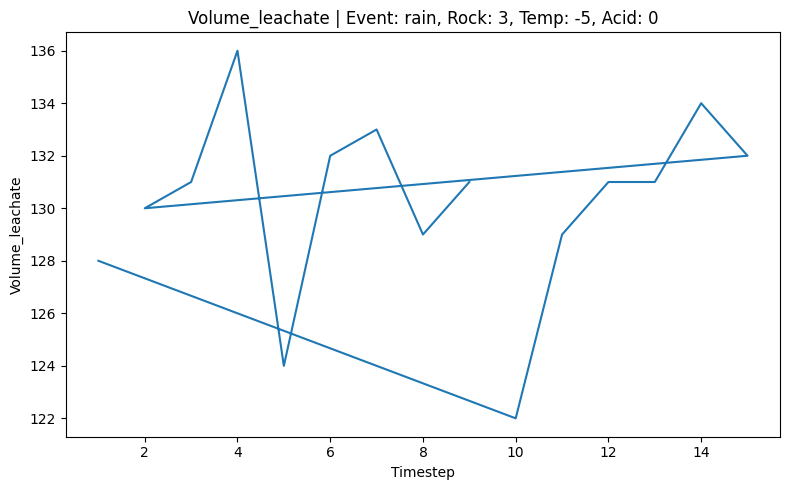

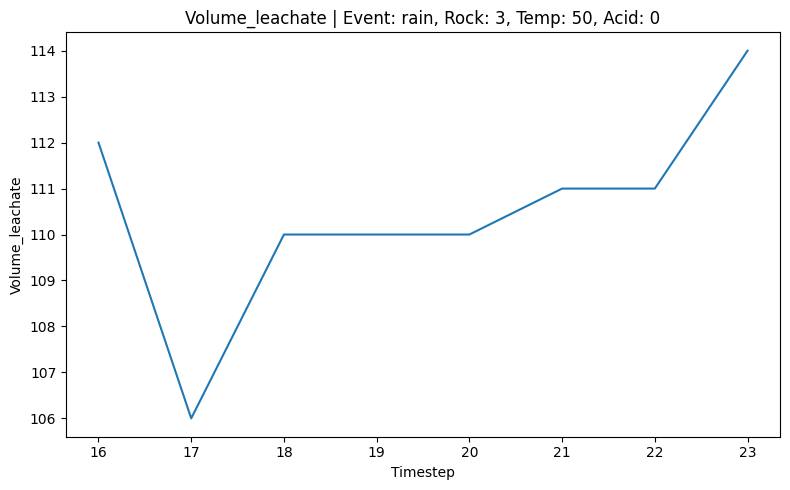

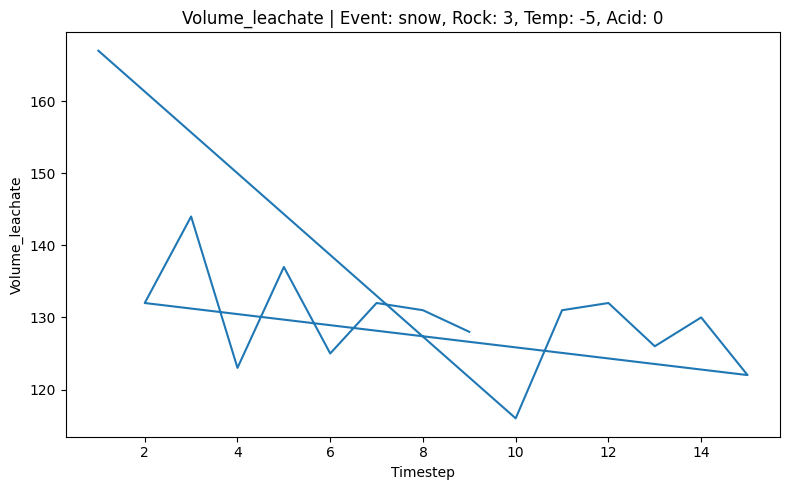

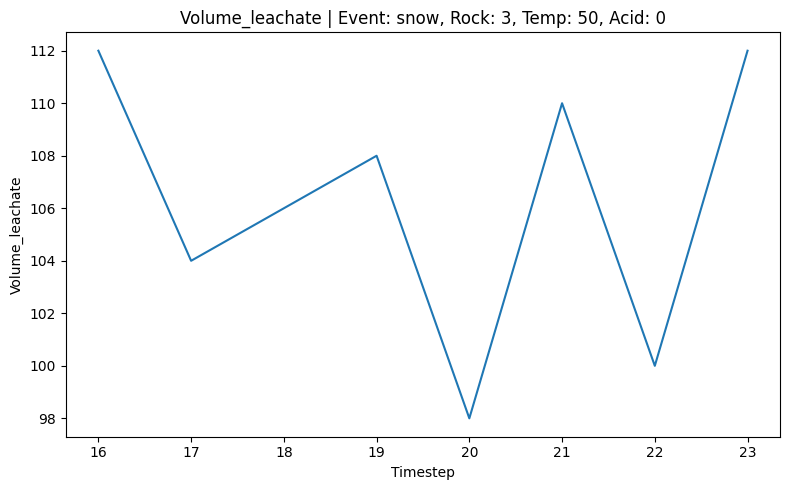

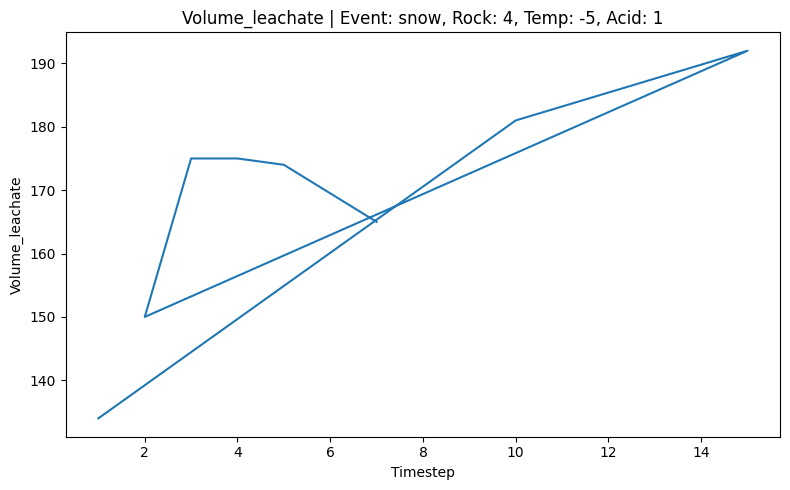

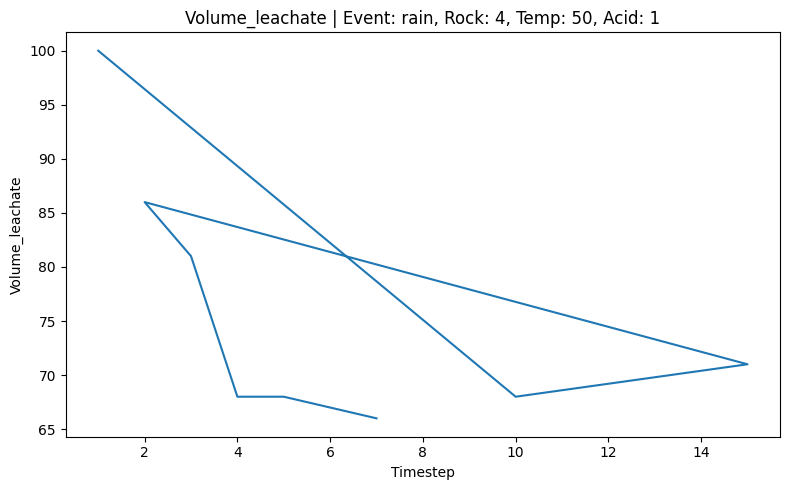

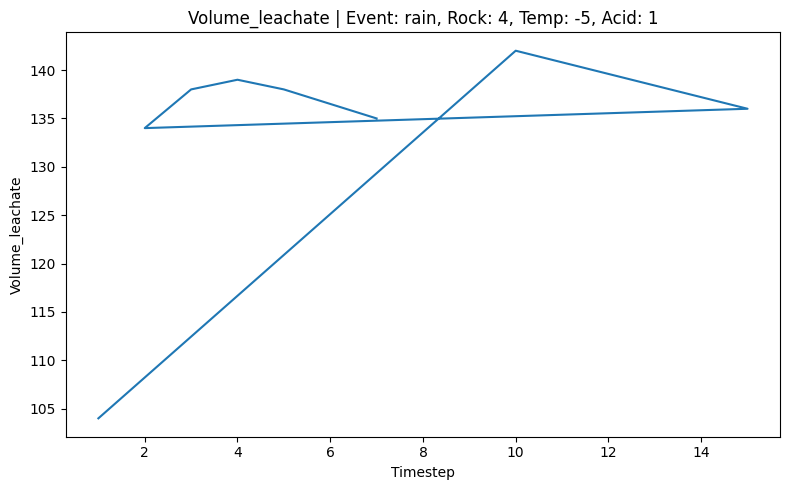

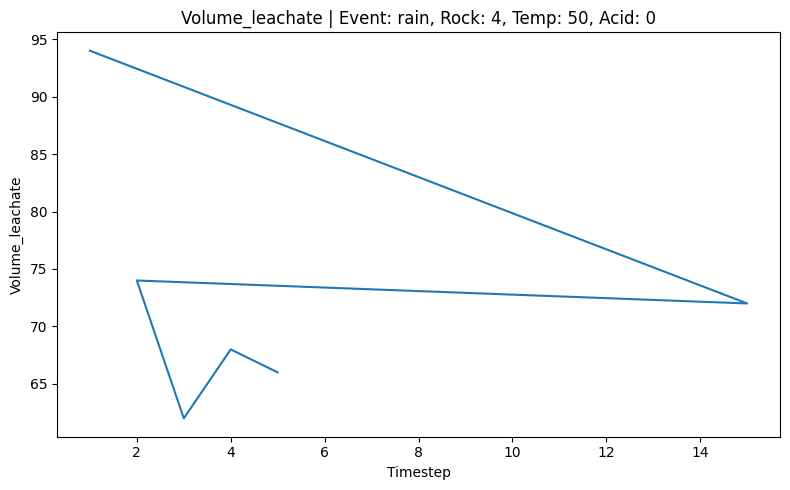

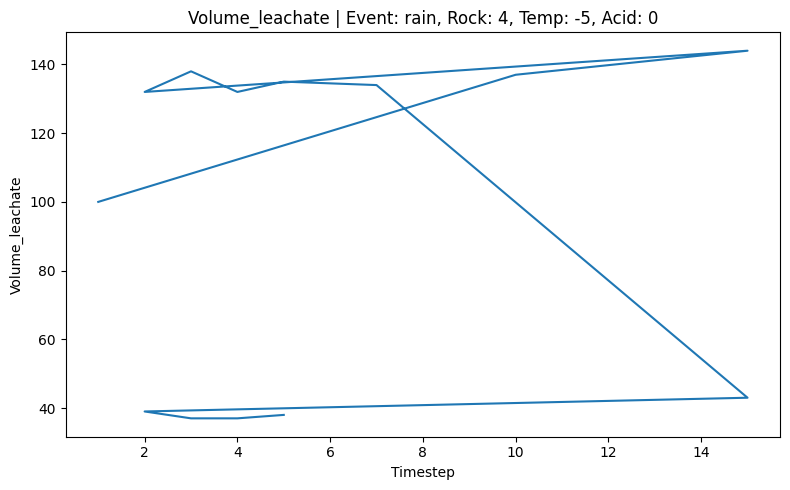

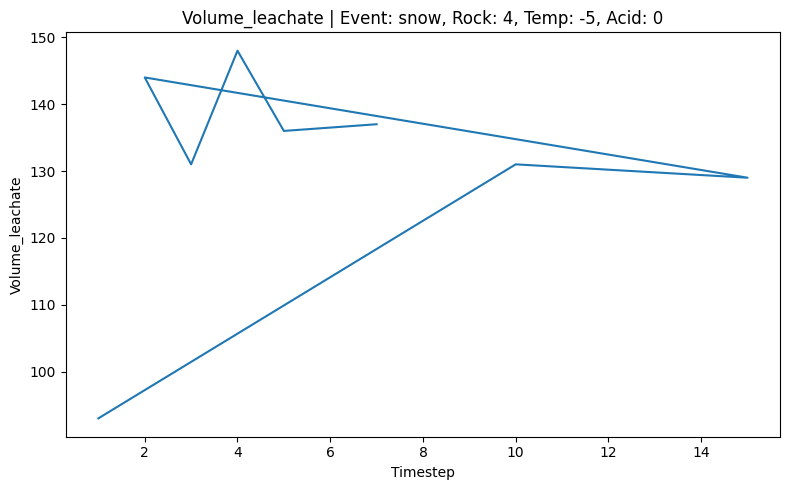

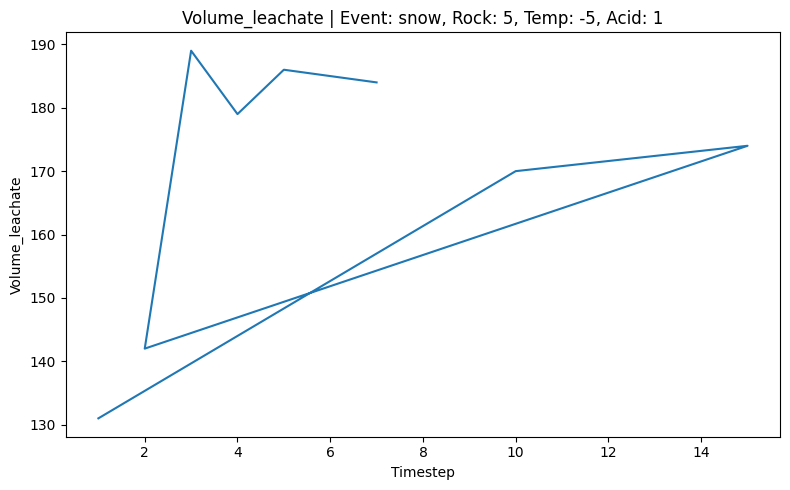

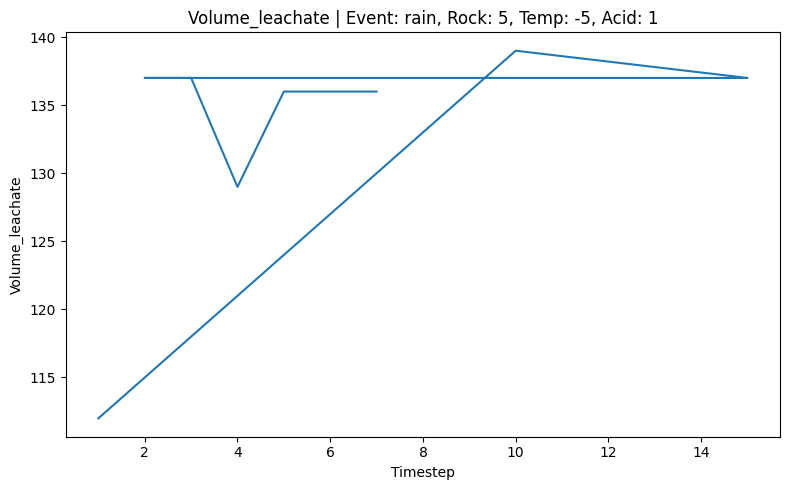

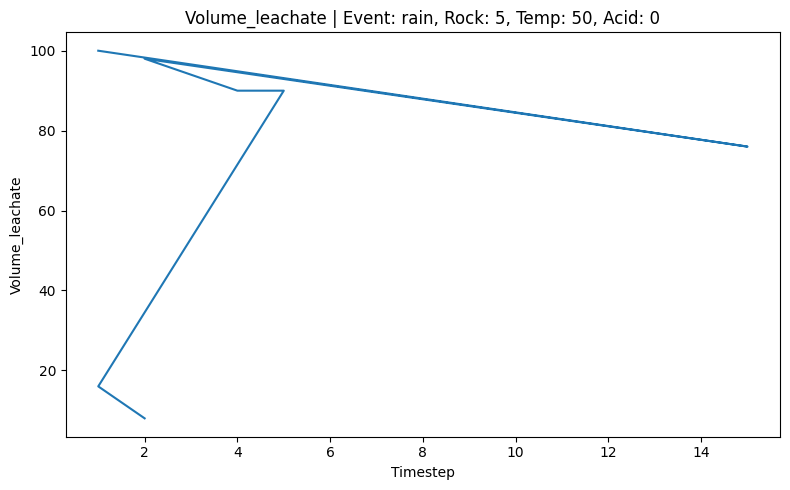

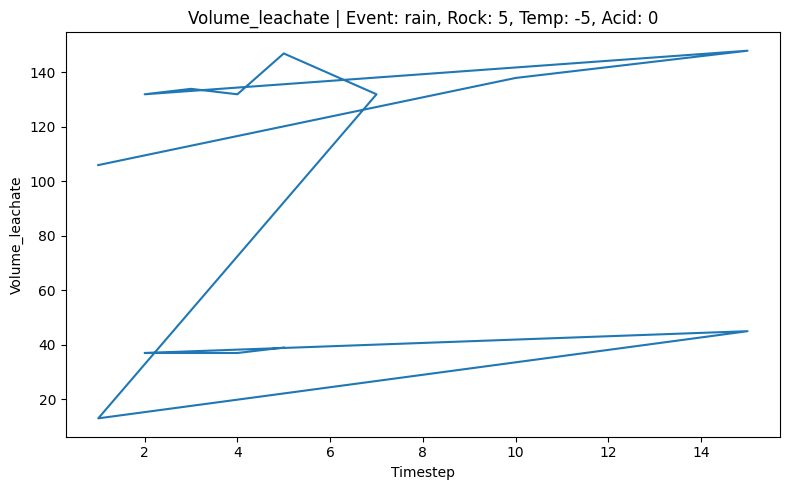

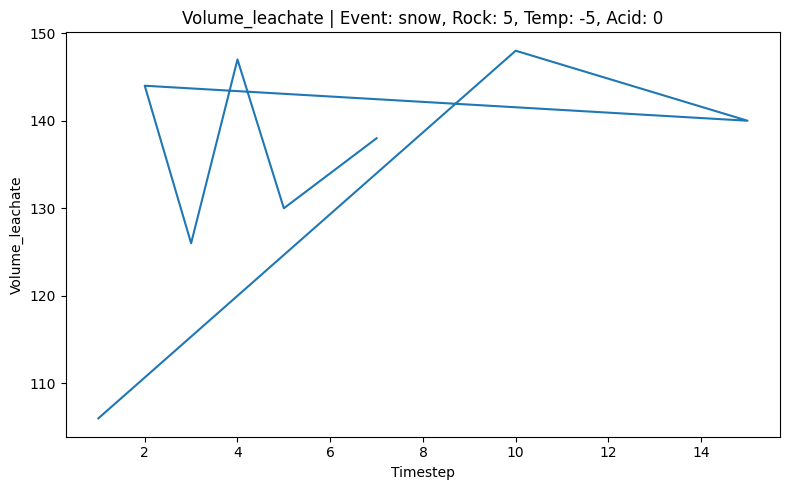

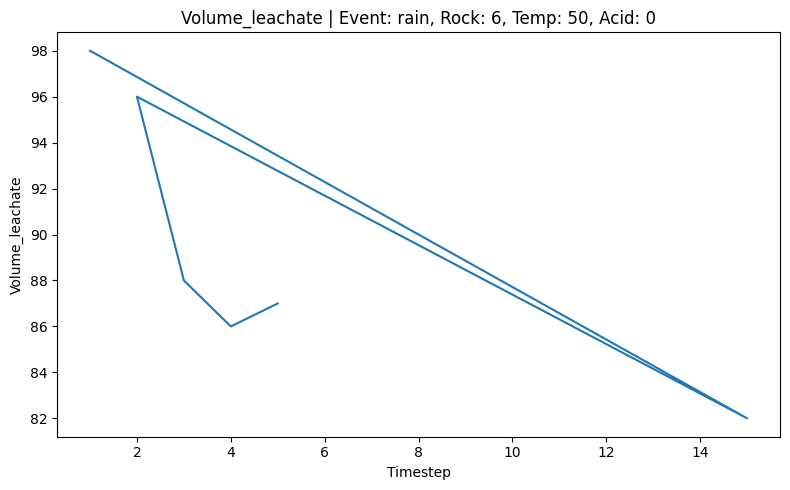

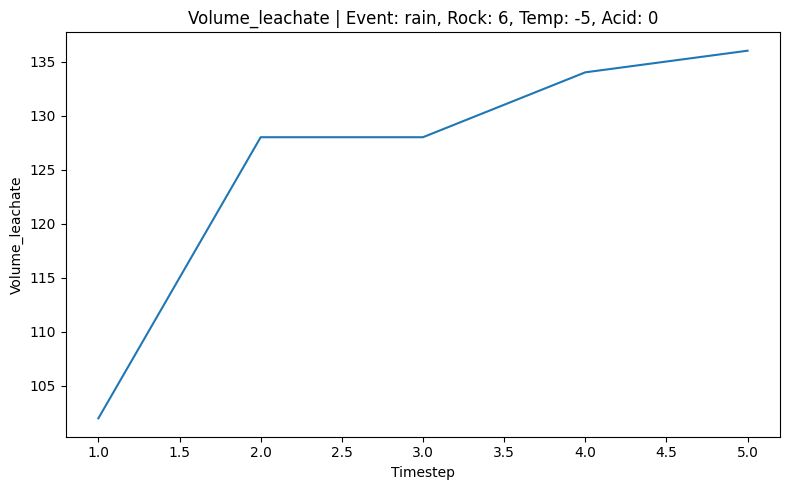

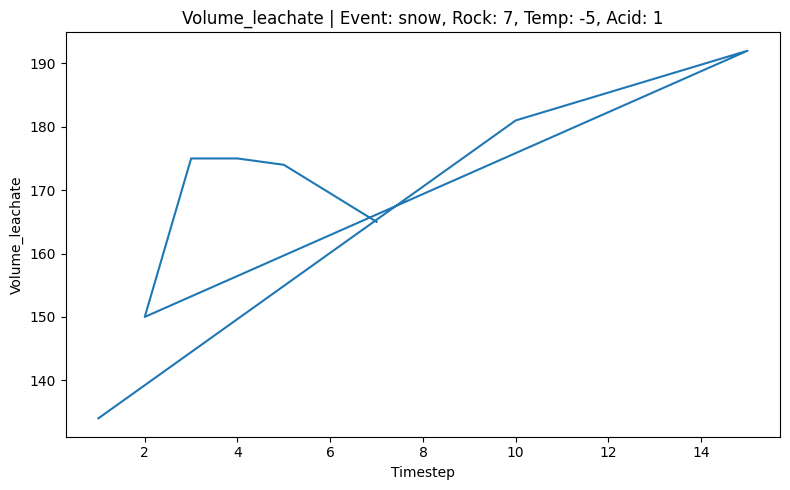

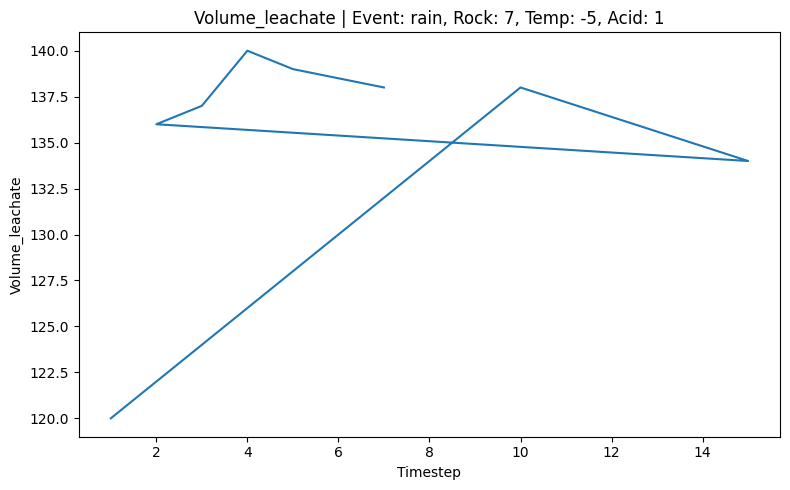

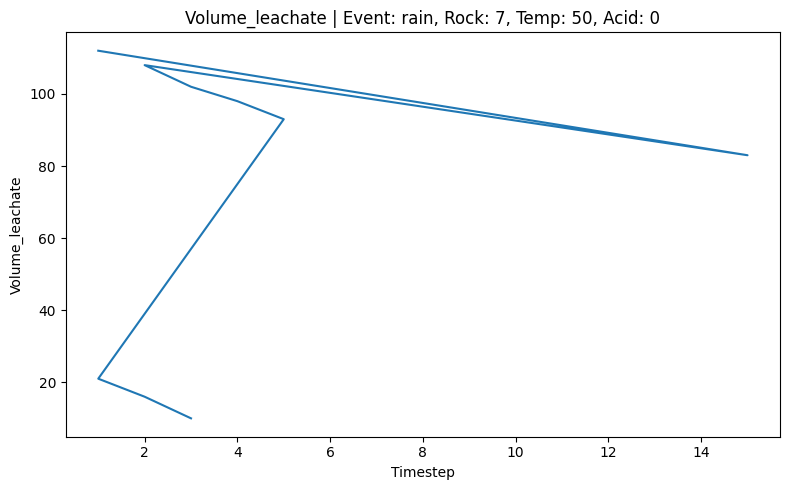

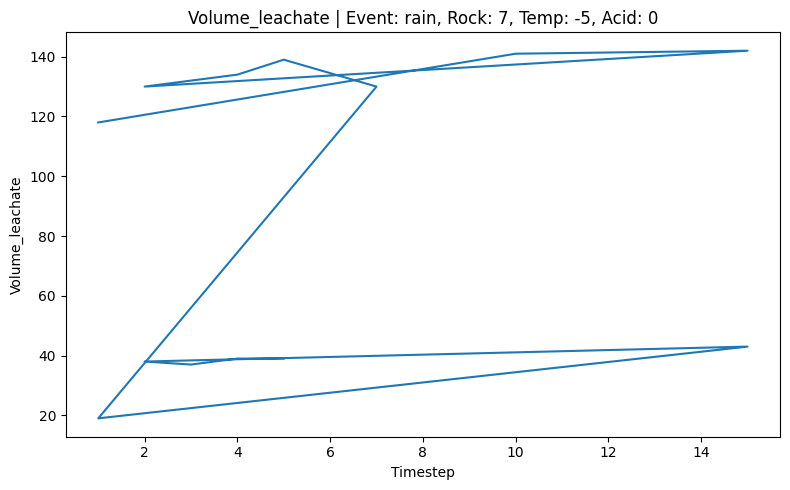

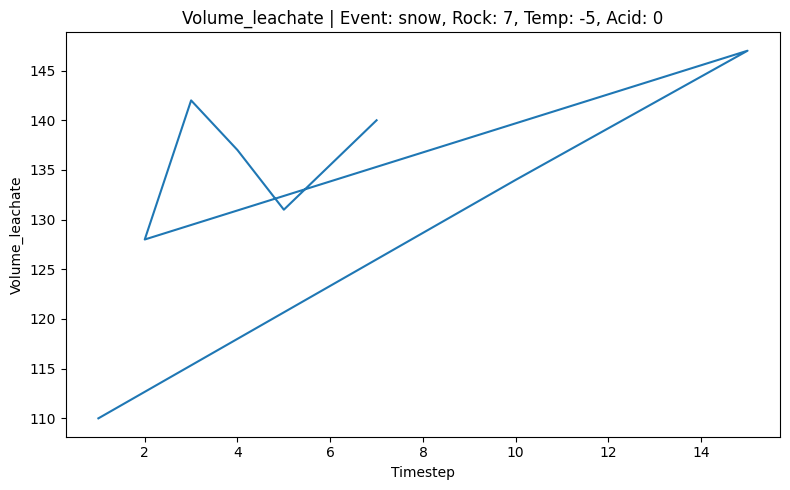

In [11]:
import matplotlib.pyplot as plt

for index, row in unique_combinations.iterrows():
    event = row['Type_event']
    rock = row['Rock_number']
    temp = row['Temp']
    acid = row['Acid']

    sub = df[(df["Type_event"] == event) & (df["Rock_number"] == rock) & (df["Temp"] == temp) & (df["Acid"] == acid)]

    if sub.empty:
        continue

    plt.figure(figsize=(8, 5))
    plt.plot(sub["Timestep"], sub["Volume_leachate"])

    plt.title(f"Volume_leachate | Event: {event}, Rock: {rock}, Temp: {temp}, Acid: {acid}")
    plt.xlabel("Timestep")
    plt.ylabel("Volume_leachate")

    plt.tight_layout()
    plt.show()

In [12]:
import re

def looks_numeric(s):
    return bool(re.match(r"^[\d\.,\s\-]+$", str(s)))

numeric_object_cols = []

for col in df.select_dtypes(include="object").columns:
    sample = df[col].dropna().iloc[0]
    if looks_numeric(sample):
        numeric_object_cols.append(col)

numeric_object_cols


df[numeric_object_cols] = (
    df[numeric_object_cols]
    .apply(lambda col: col.str.replace(',', '.', regex=False))
    .apply(pd.to_numeric, errors='coerce')
)


In [13]:
df_26cut = df.iloc[:, :26]

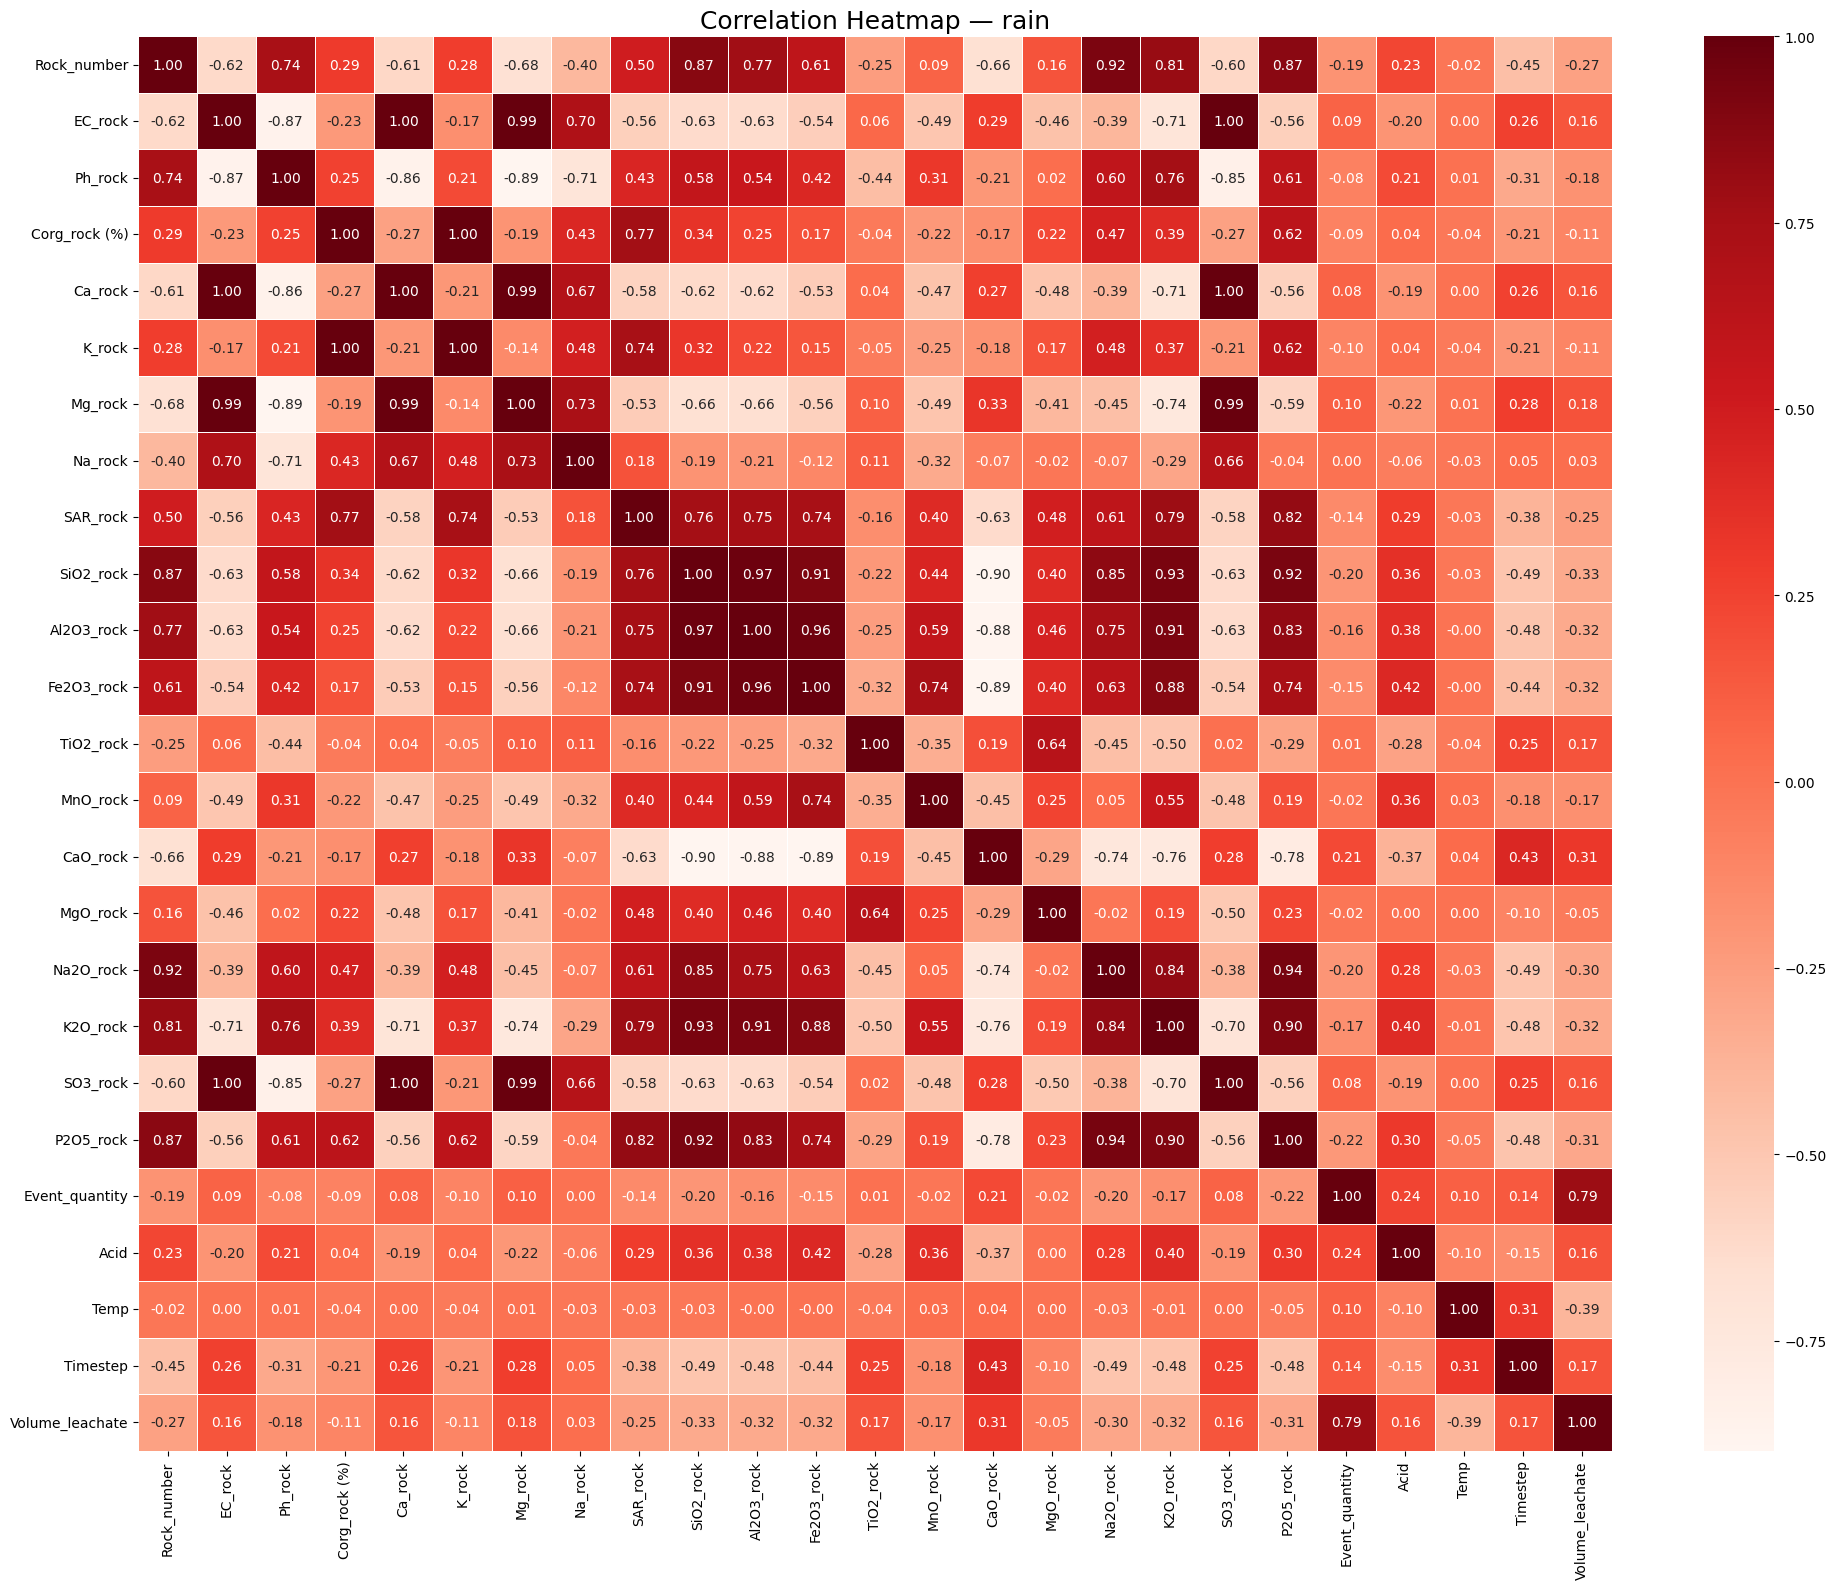

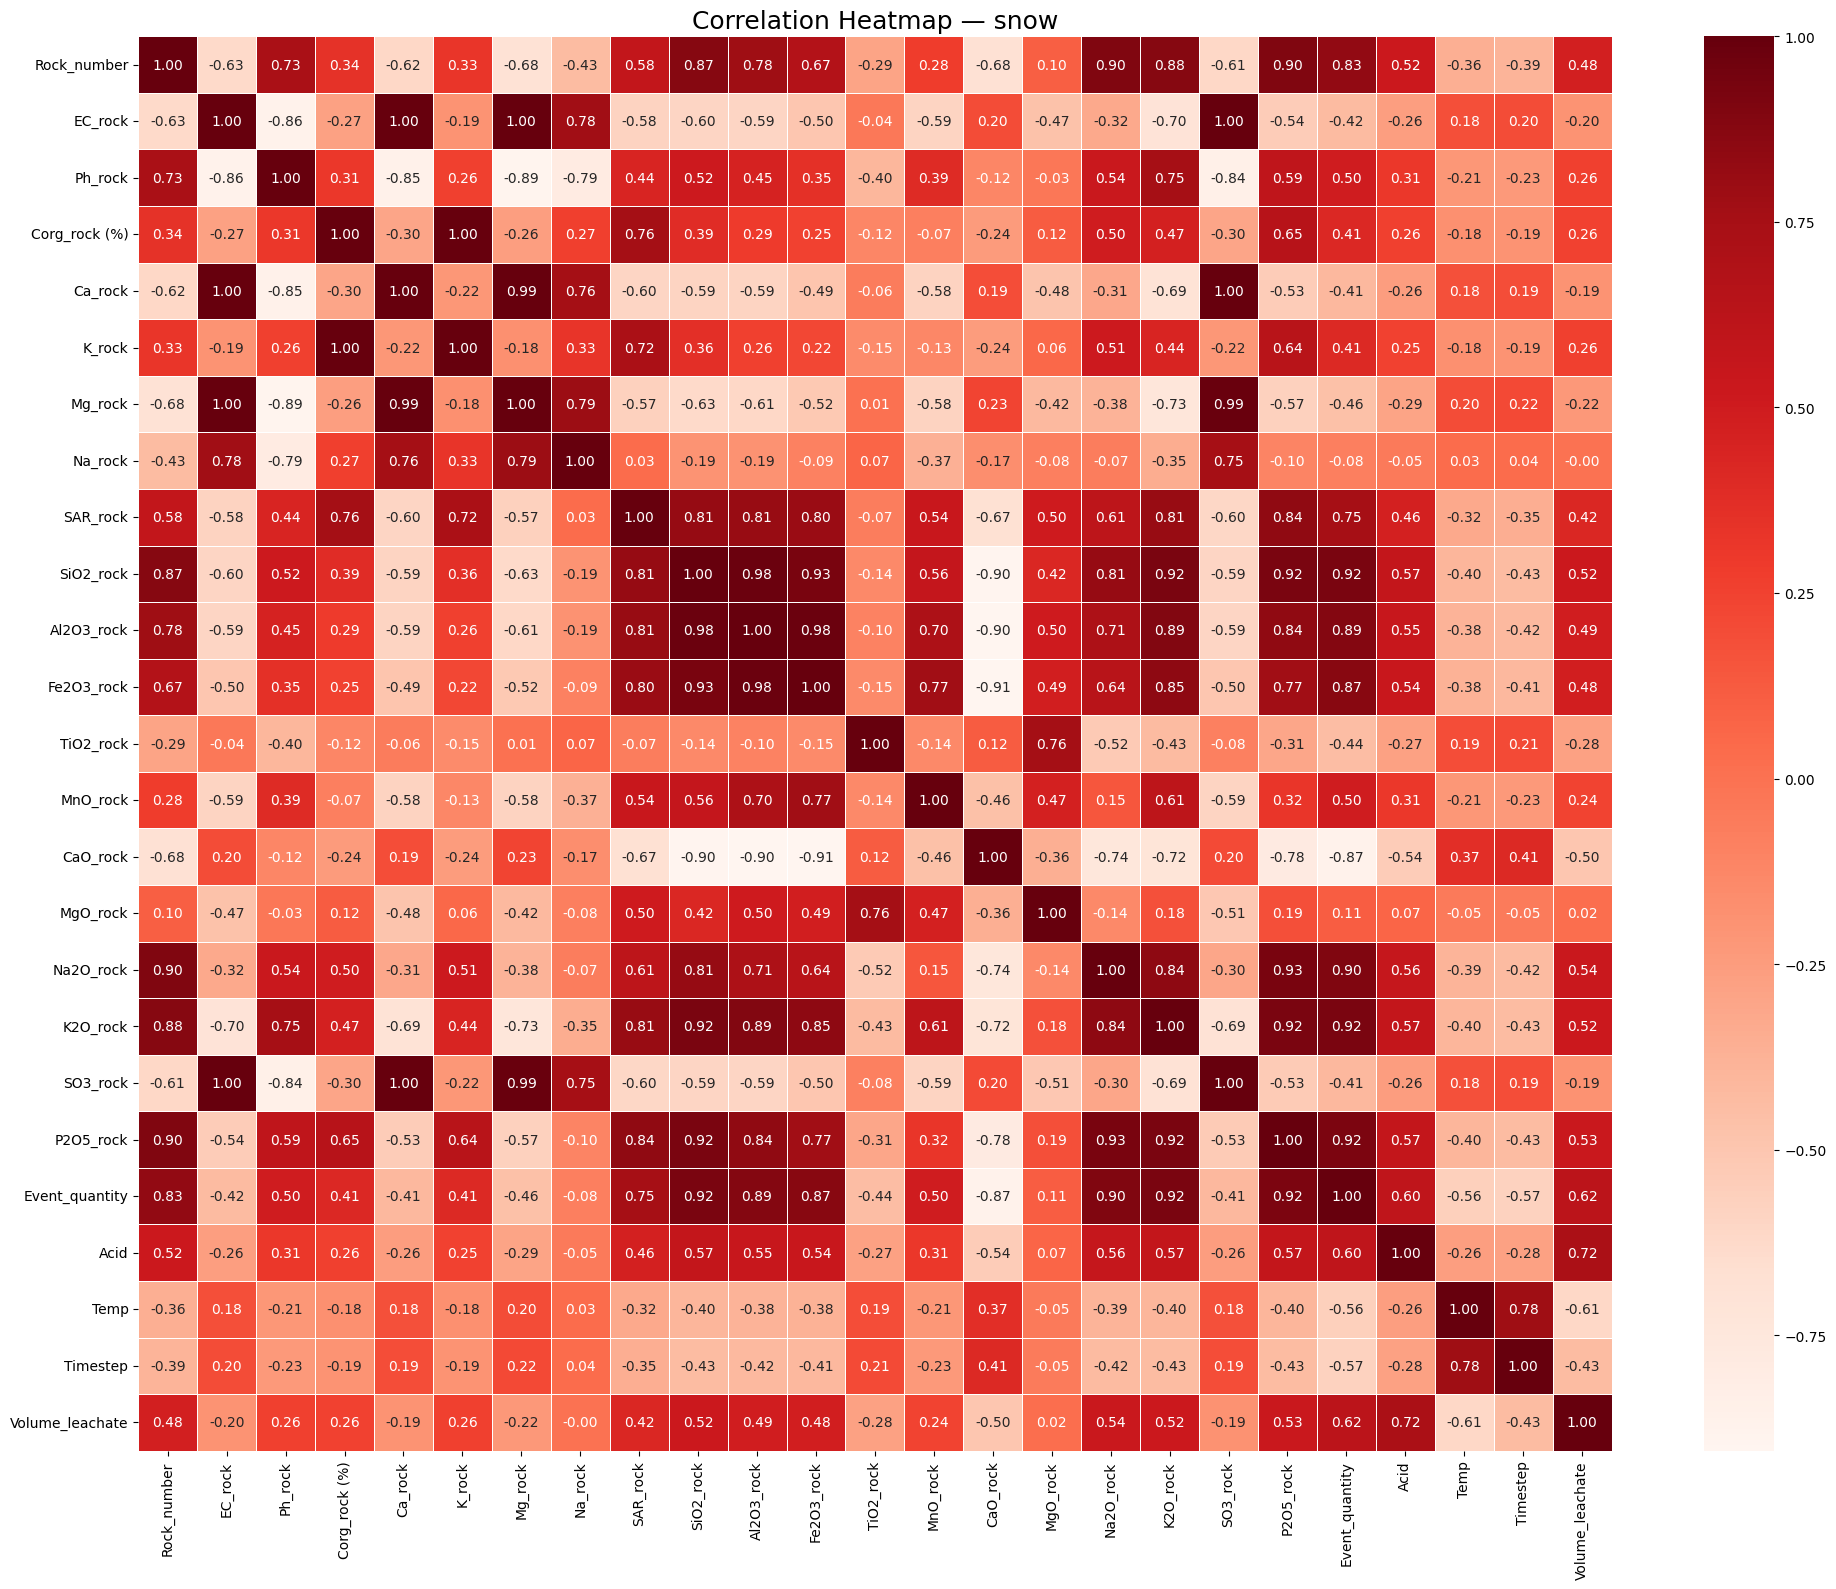

In [14]:
for event in df_26cut['Type_event'].unique():
    sub = df_26cut[df_26cut['Type_event'] == event].select_dtypes(include=['float64','int64'])

    plt.figure(figsize=(20, 16))
    sns.heatmap(
        sub.corr(),
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="white"
    )

    plt.title(f"Correlation Heatmap — {event}", fontsize=18)
    plt.tight_layout()
    plt.show()


In [31]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import joblib

targets = [
    "Volume_leachate", "EC_leachate", "Ph_leachate",
    "Chloride_leachate", "Carbonate_leachate", "Sulfate_leachate",
    "Nitrate_leachate", "Phosphate_leachate", "Ca_leachate",
    "Fe_leachate", "K_leachate", "Mg_leachate", "Mn_leachate", "Na_leachate"
]

cols_to_remove = ["Rock_number"]
X = df.drop(columns=[c for c in cols_to_remove if c in df.columns] + targets)

if "Type_event" in X.columns:
    X["Type_event"] = X["Type_event"].astype("category")

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1,
}

models = {}
results = []
preds_val = pd.DataFrame(index=X.index)

os.makedirs("Models", exist_ok=True)

for target_col in targets:
    if target_col not in df.columns:
        continue

    y = df[target_col]

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, val_data],
        valid_names=["train", "val"],
        num_boost_round=2000,
        callbacks=[lgb.early_stopping(stopping_rounds=50)]
    )

    models[target_col] = model
    preds_val.loc[y_val.index, target_col] = model.predict(X_val)

    joblib.dump(model, f"Models/{target_col}.pkl")

    mse = mean_squared_error(y_val, preds_val.loc[y_val.index, target_col])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, preds_val.loc[y_val.index, target_col])
    y_min = y_val.min()
    y_max = y_val.max()

    results.append({
        "Target": target_col,
        "RMSE": rmse,
        "R²": r2,
        "Min": y_min,
        "Max": y_max
    })

results_df = pd.DataFrame(results)
results_df["RMSE"] = results_df["RMSE"].map("{:.2f}".format)
results_df["R²"] = results_df["R²"].map("{:.4f}".format)
results_df["Min"] = results_df["Min"].map("{:.2f}".format)
results_df["Max"] = results_df["Max"].map("{:.2f}".format)

print(results_df)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[475]	train's rmse: 7.04272	val's rmse: 13.0101
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[510]	train's rmse: 32.8363	val's rmse: 51.0561
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[275]	train's rmse: 0.128082	val's rmse: 0.152392
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[130]	train's rmse: 6.01594	val's rmse: 5.51171
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	train's rmse: 14.8703	val's rmse: 10.5859
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[480]	train's rmse: 26.7371	val's rmse: 39.2352
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[19]	train's rmse: 427.803	val's rmse: 

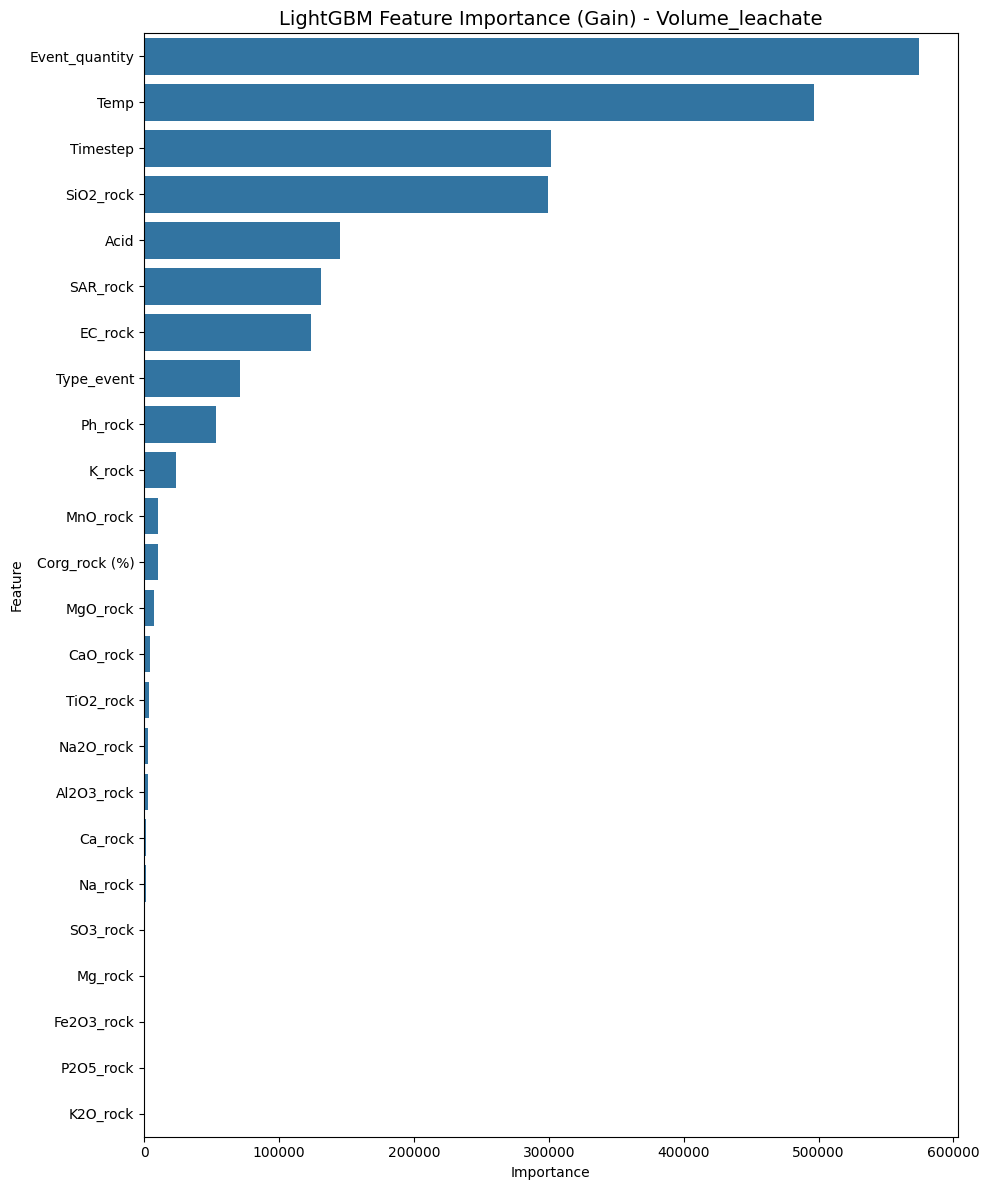

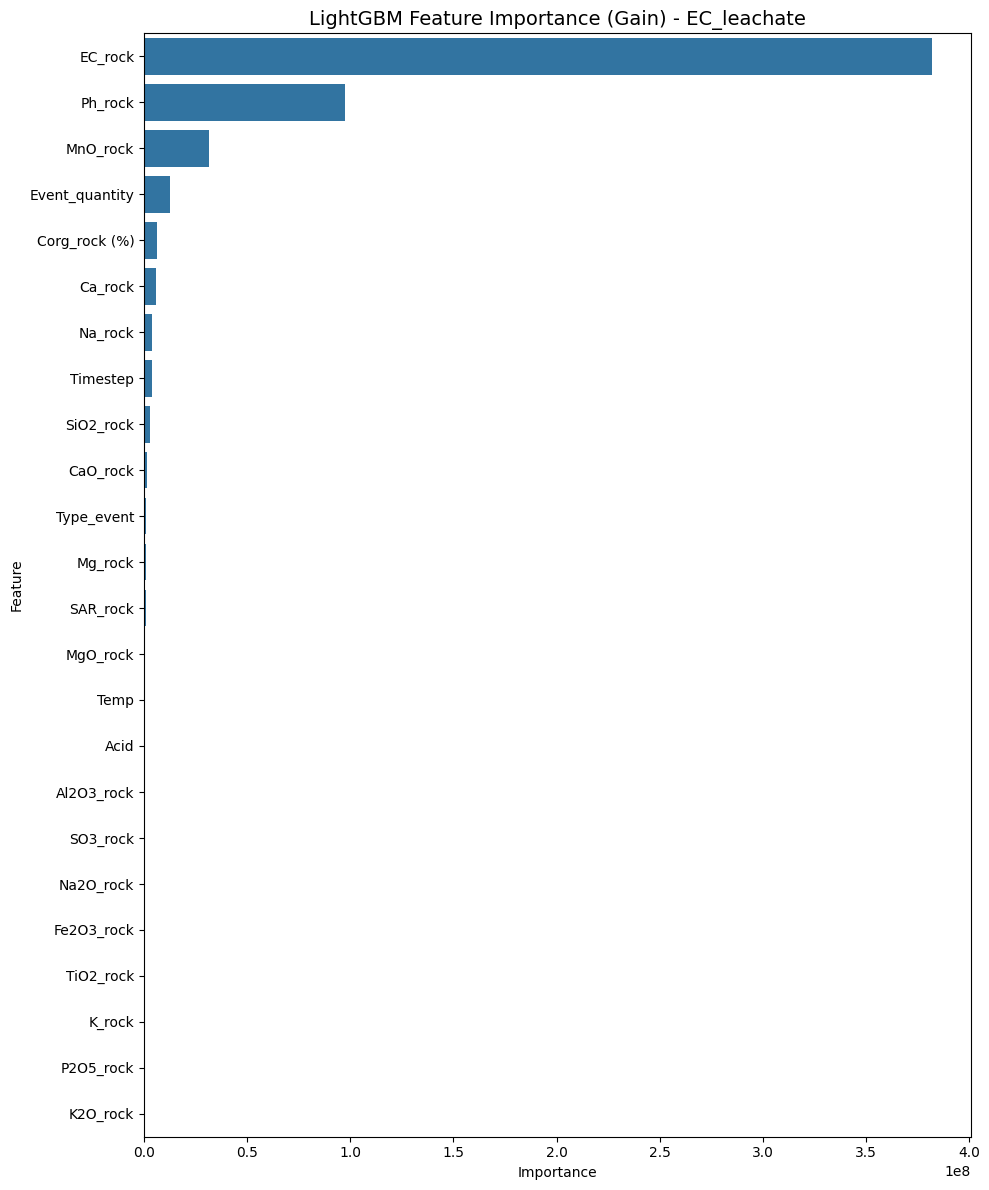

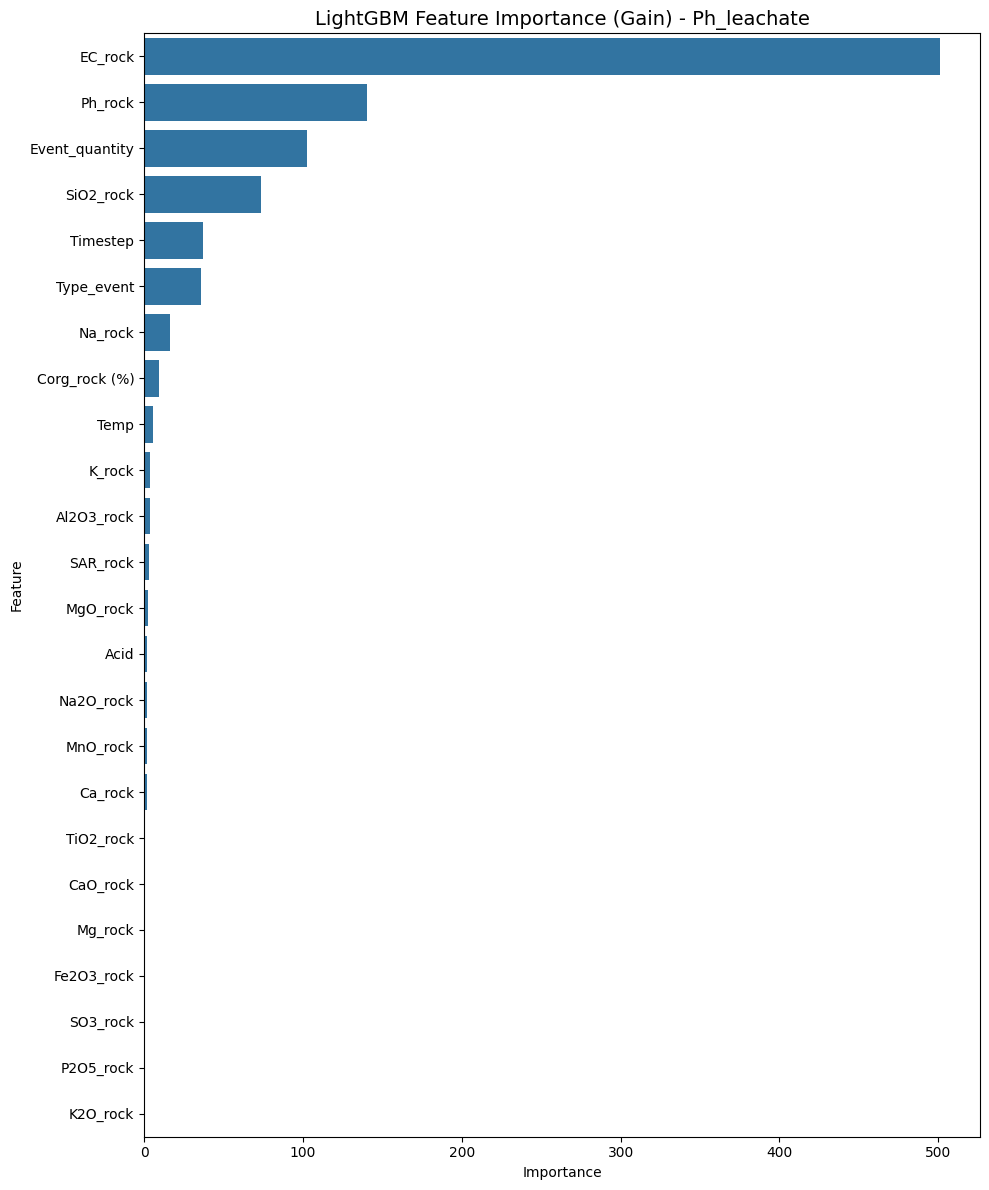

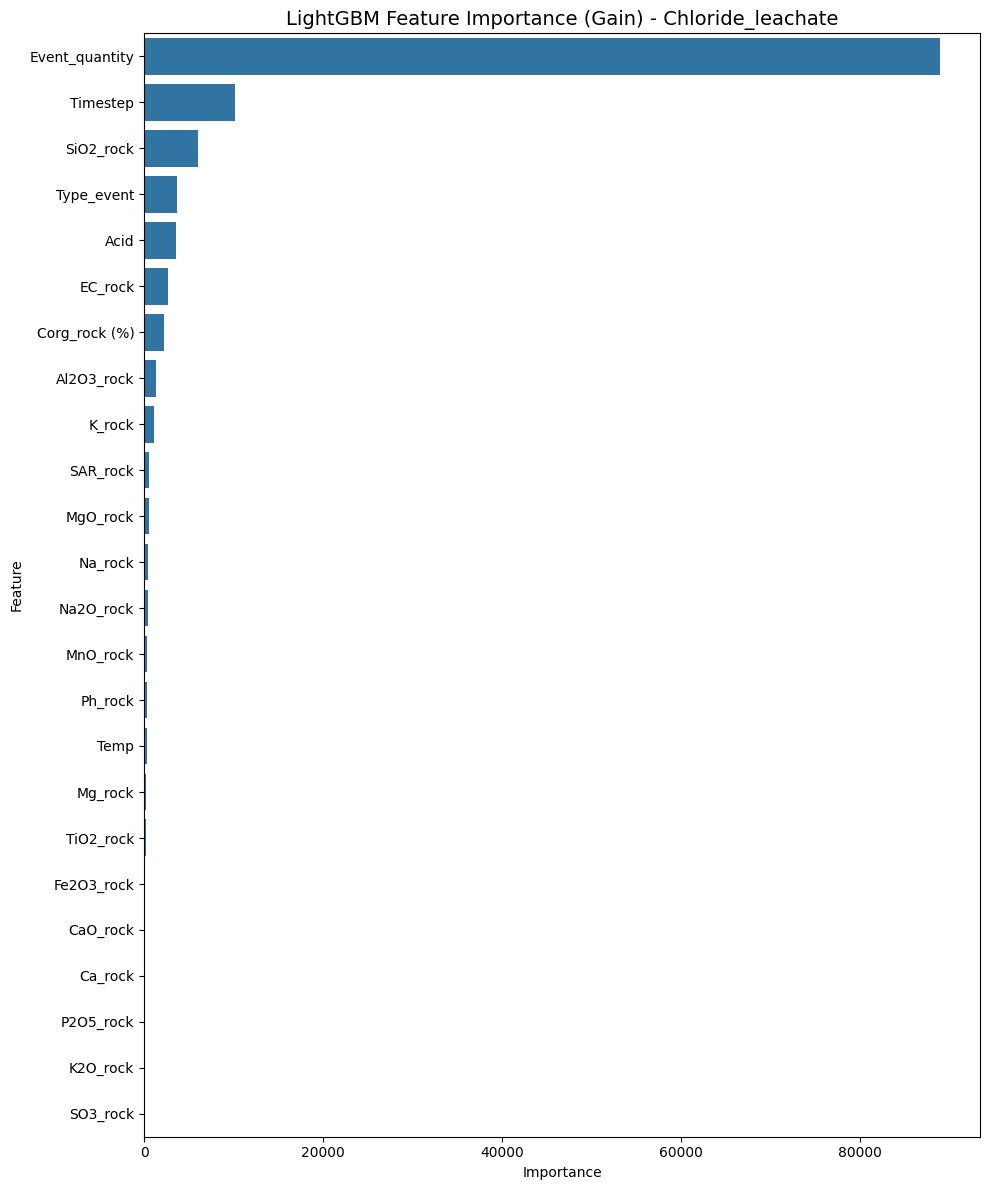

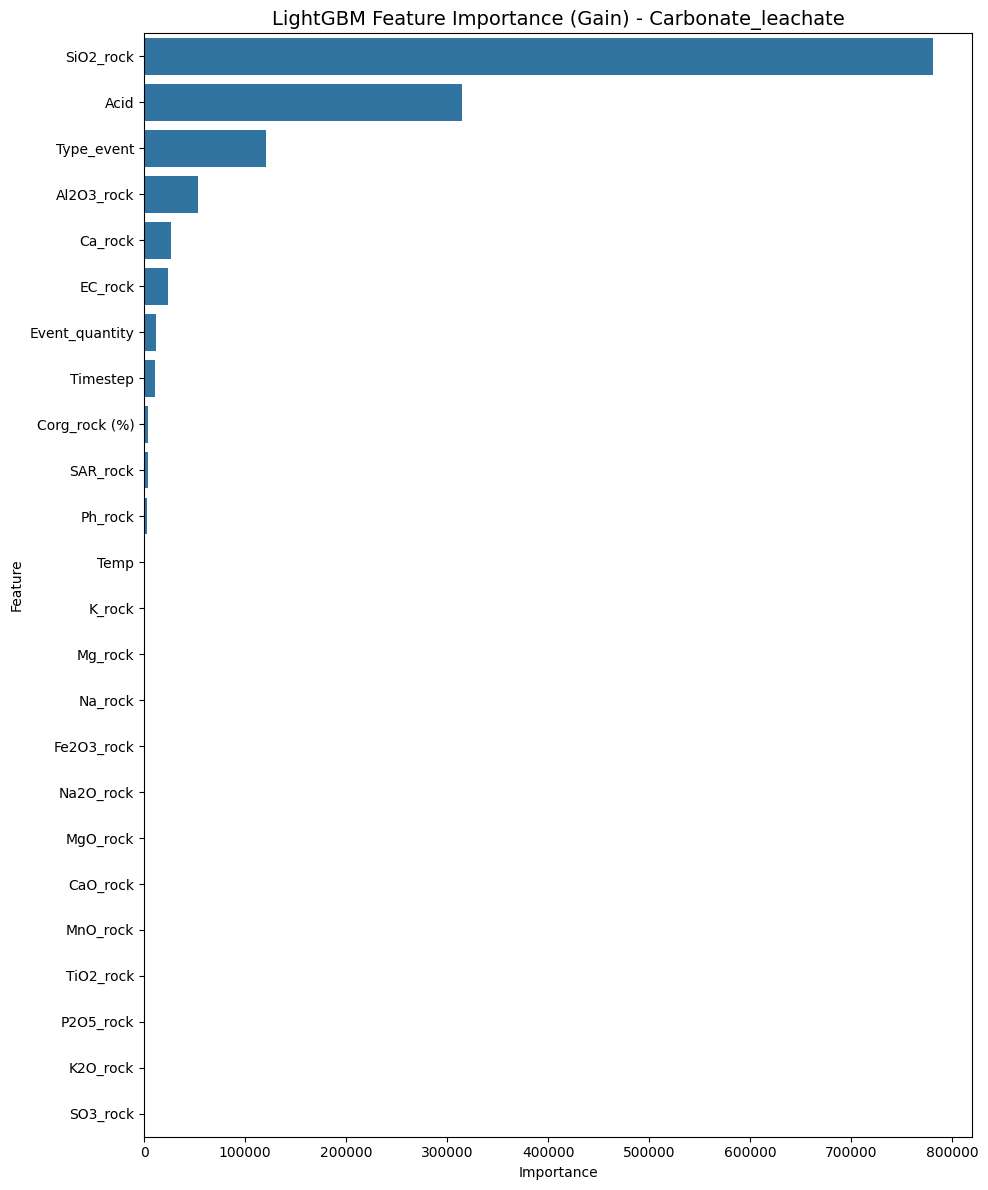

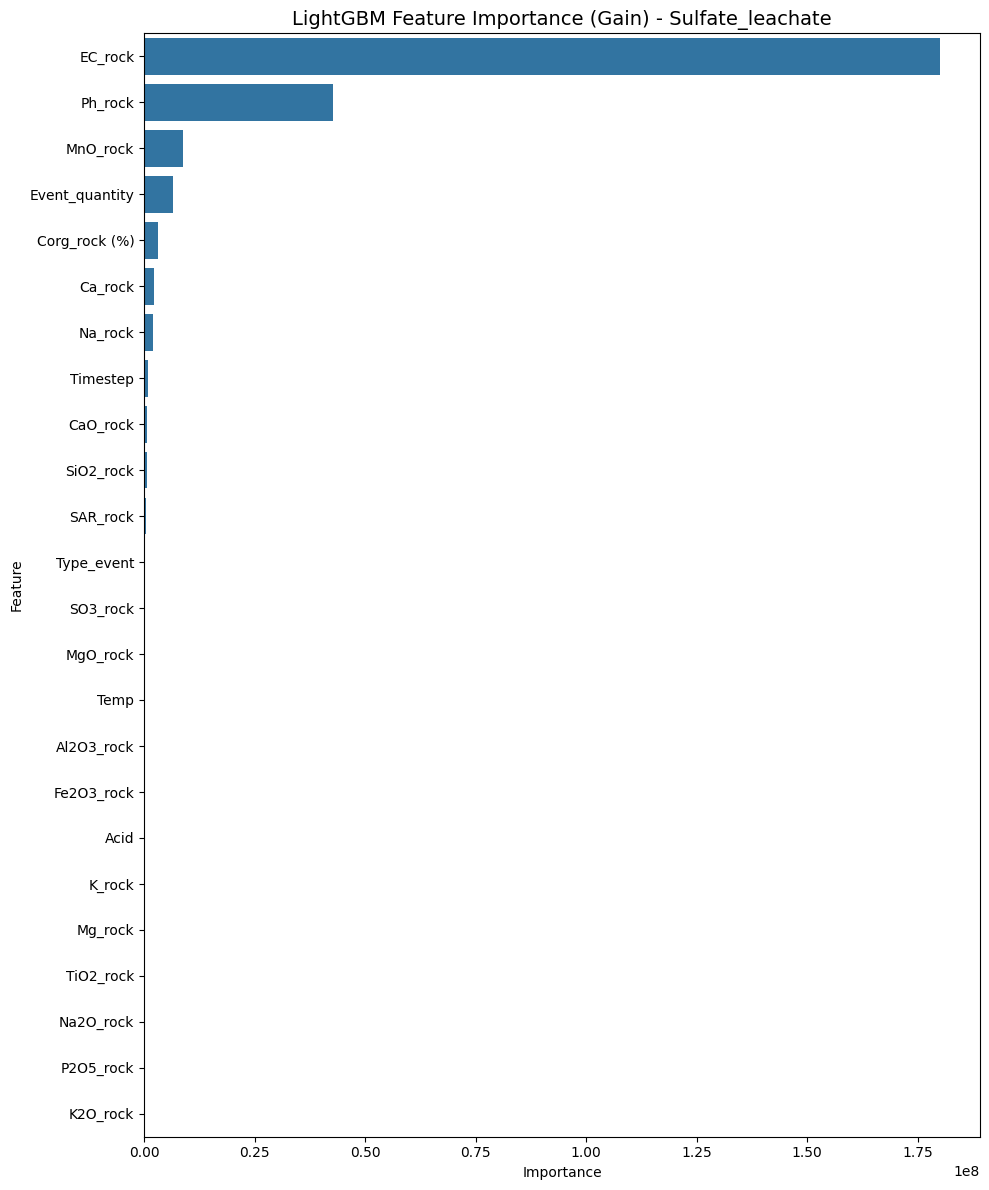

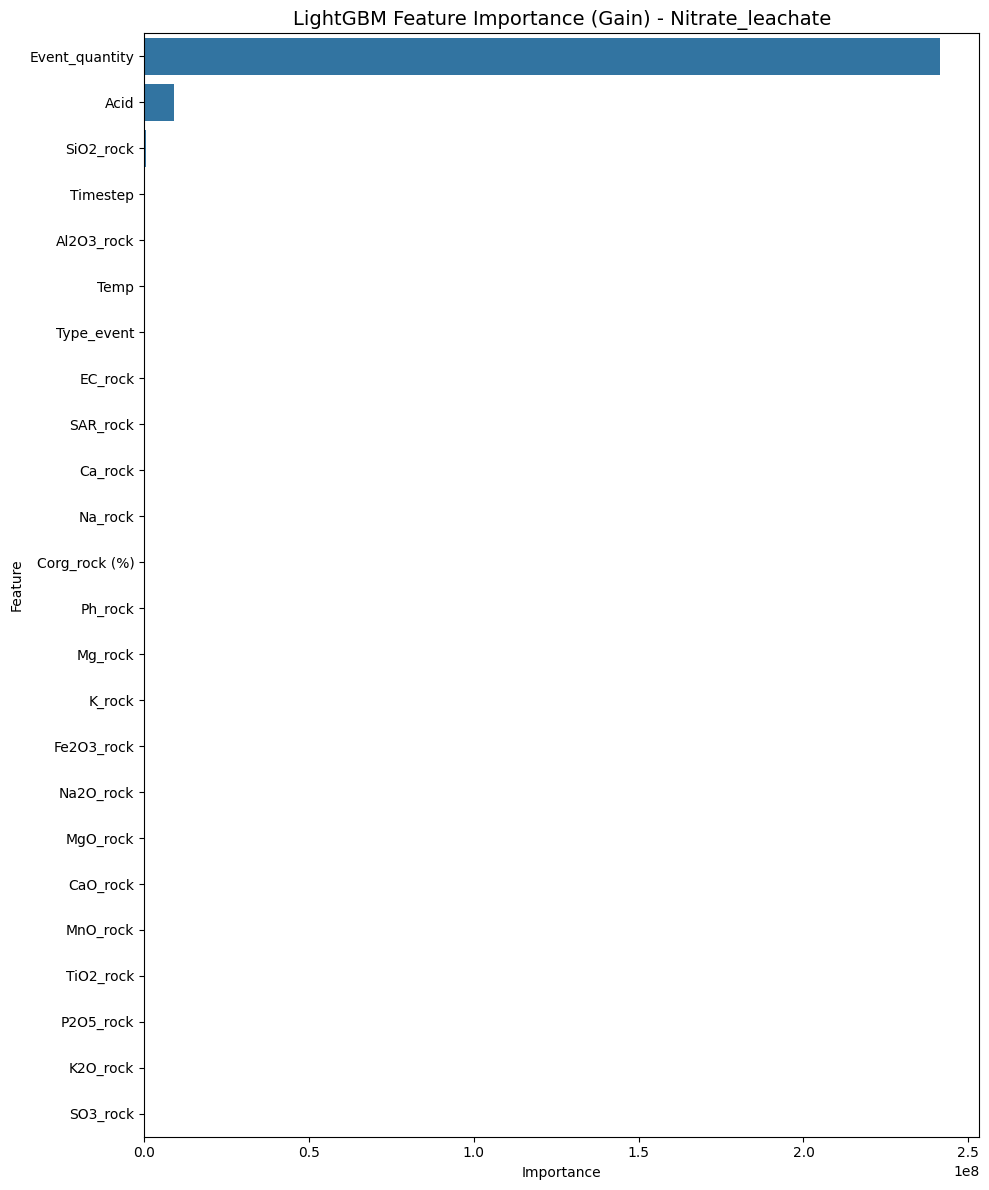

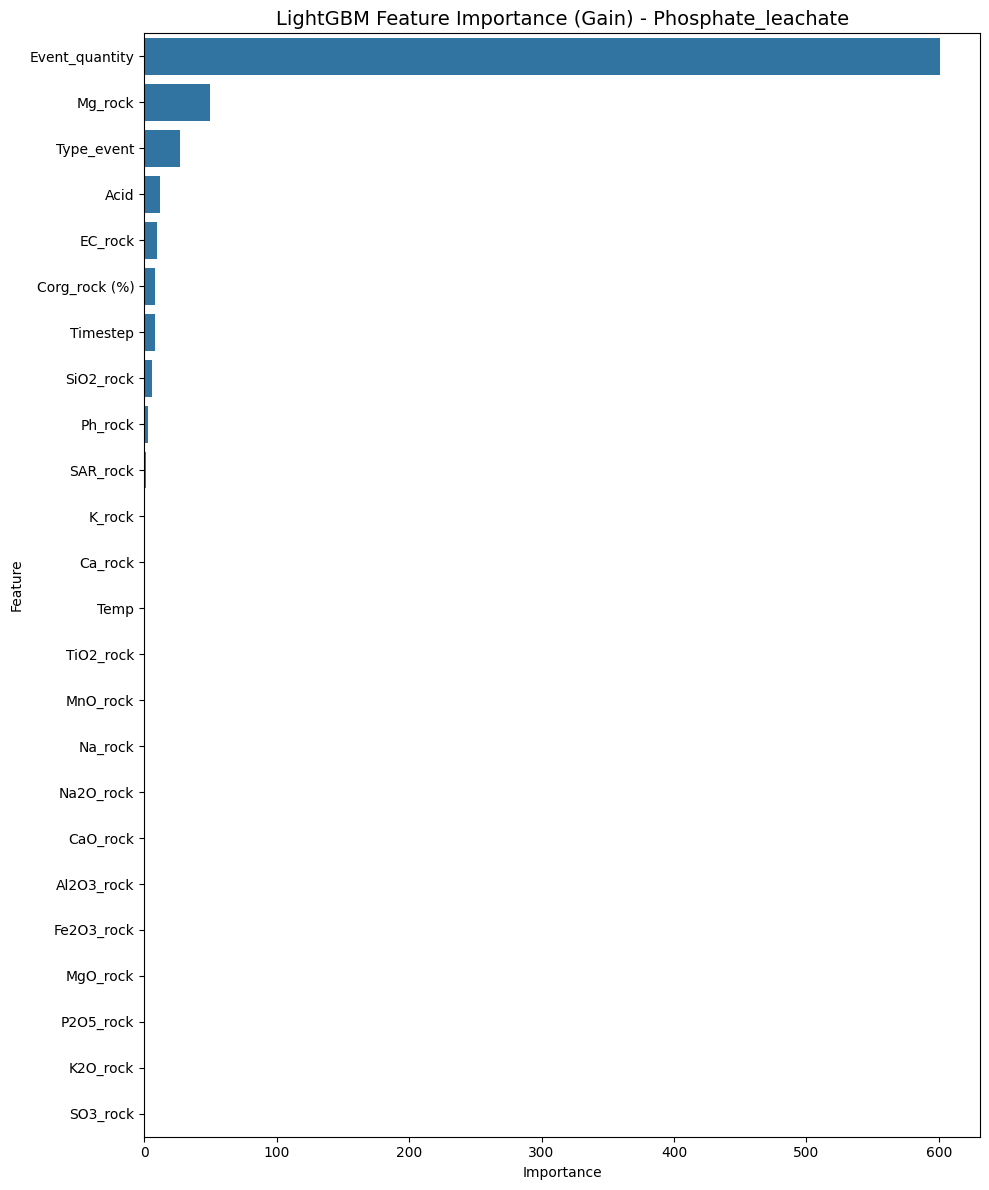

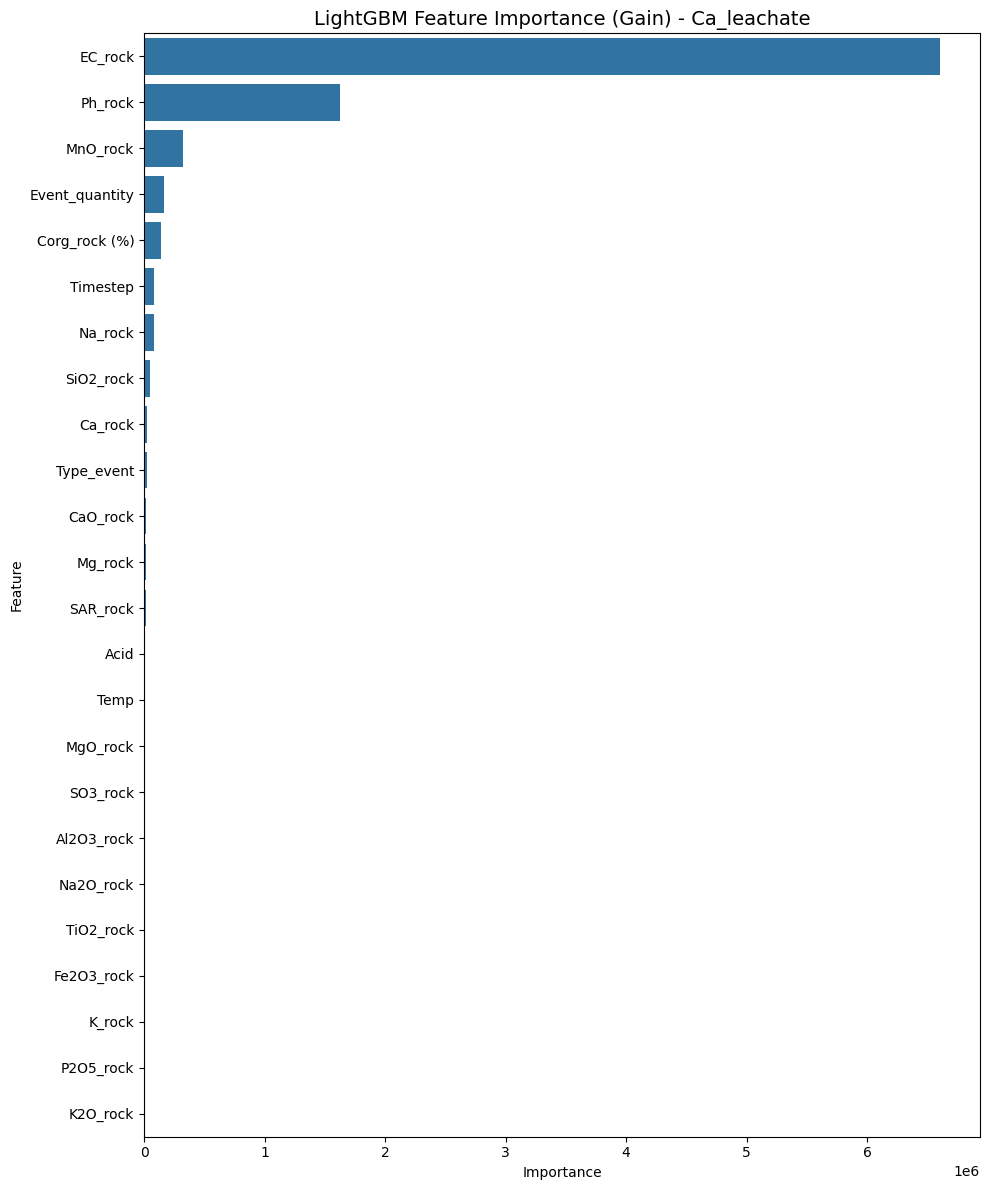

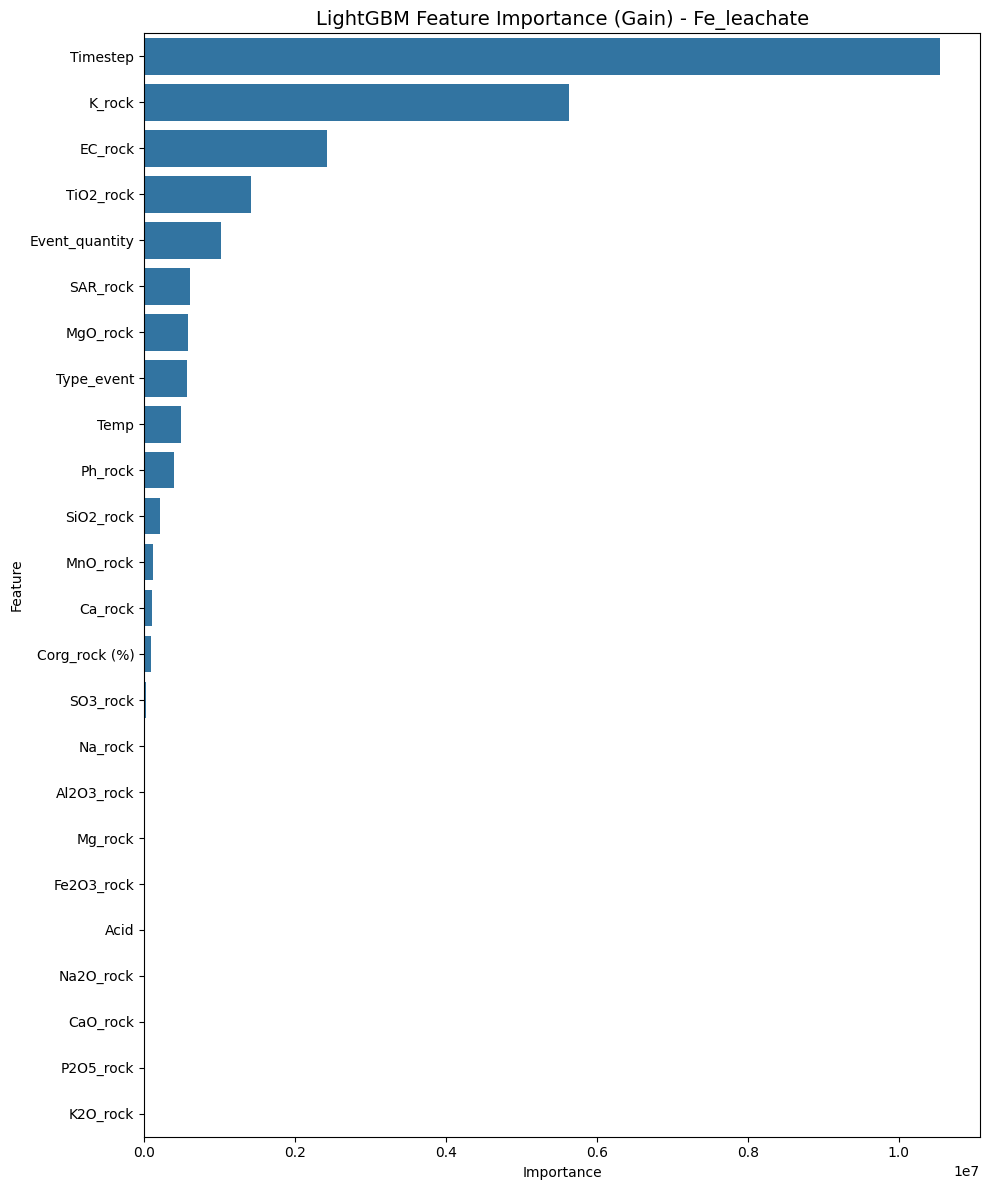

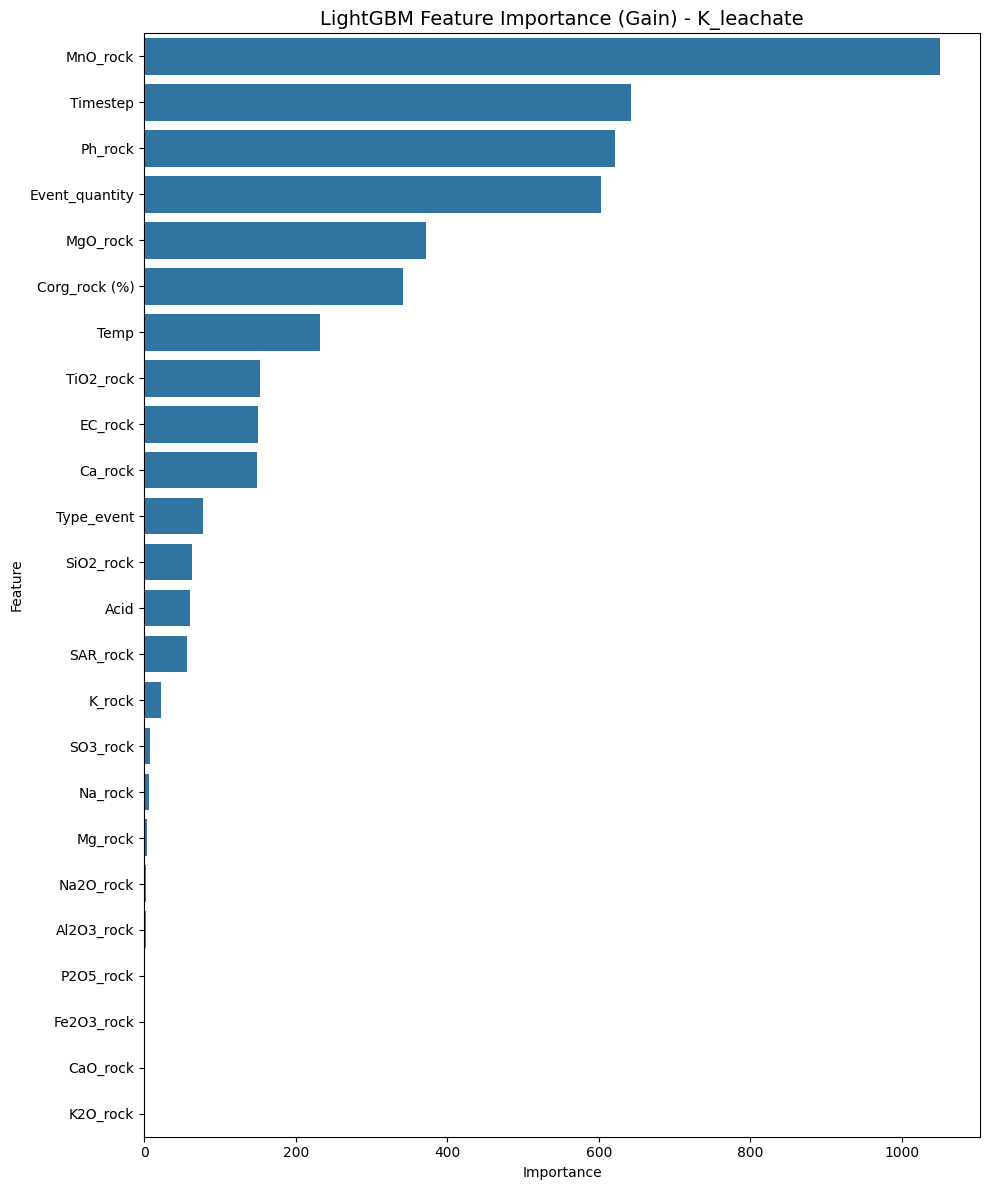

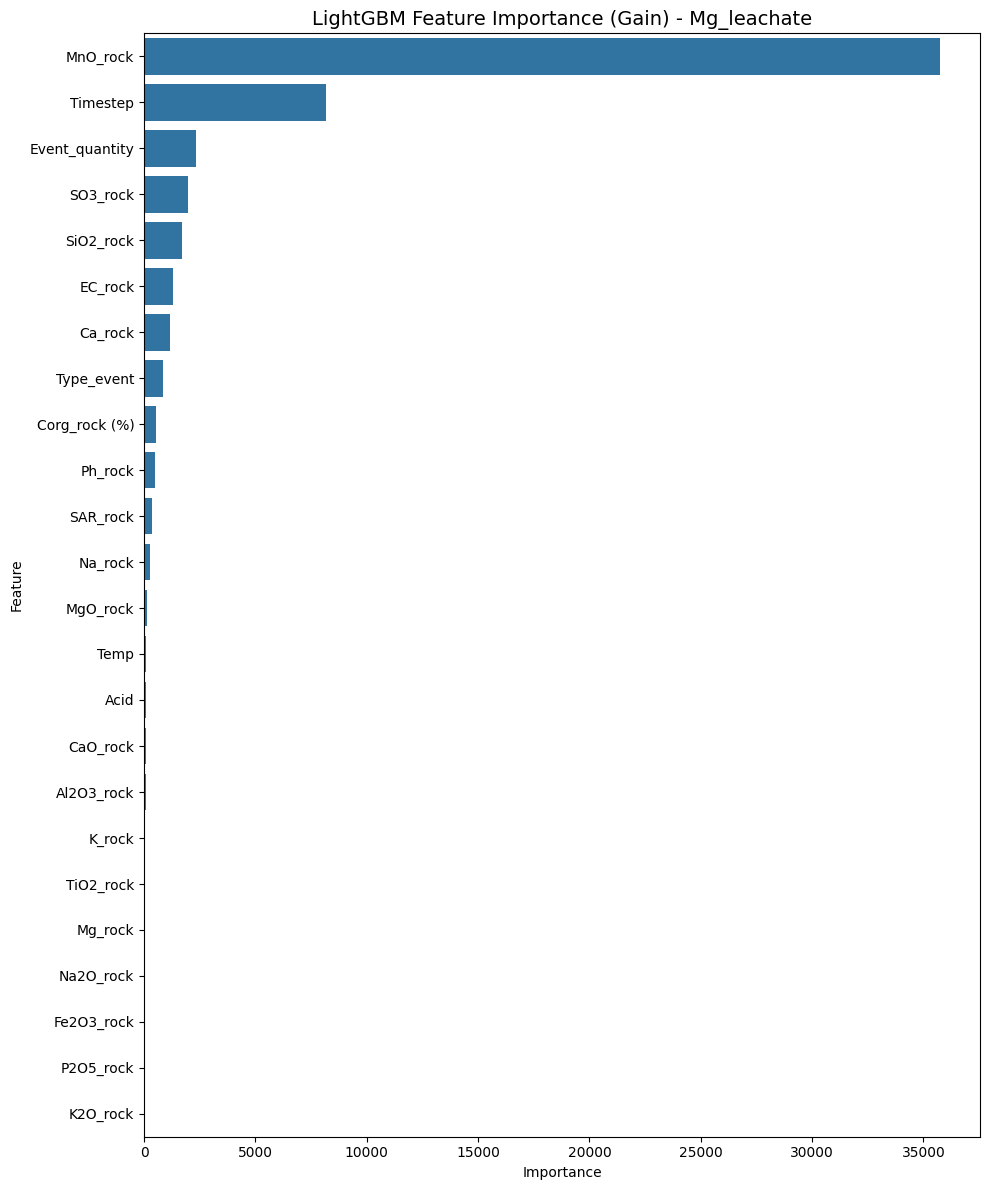

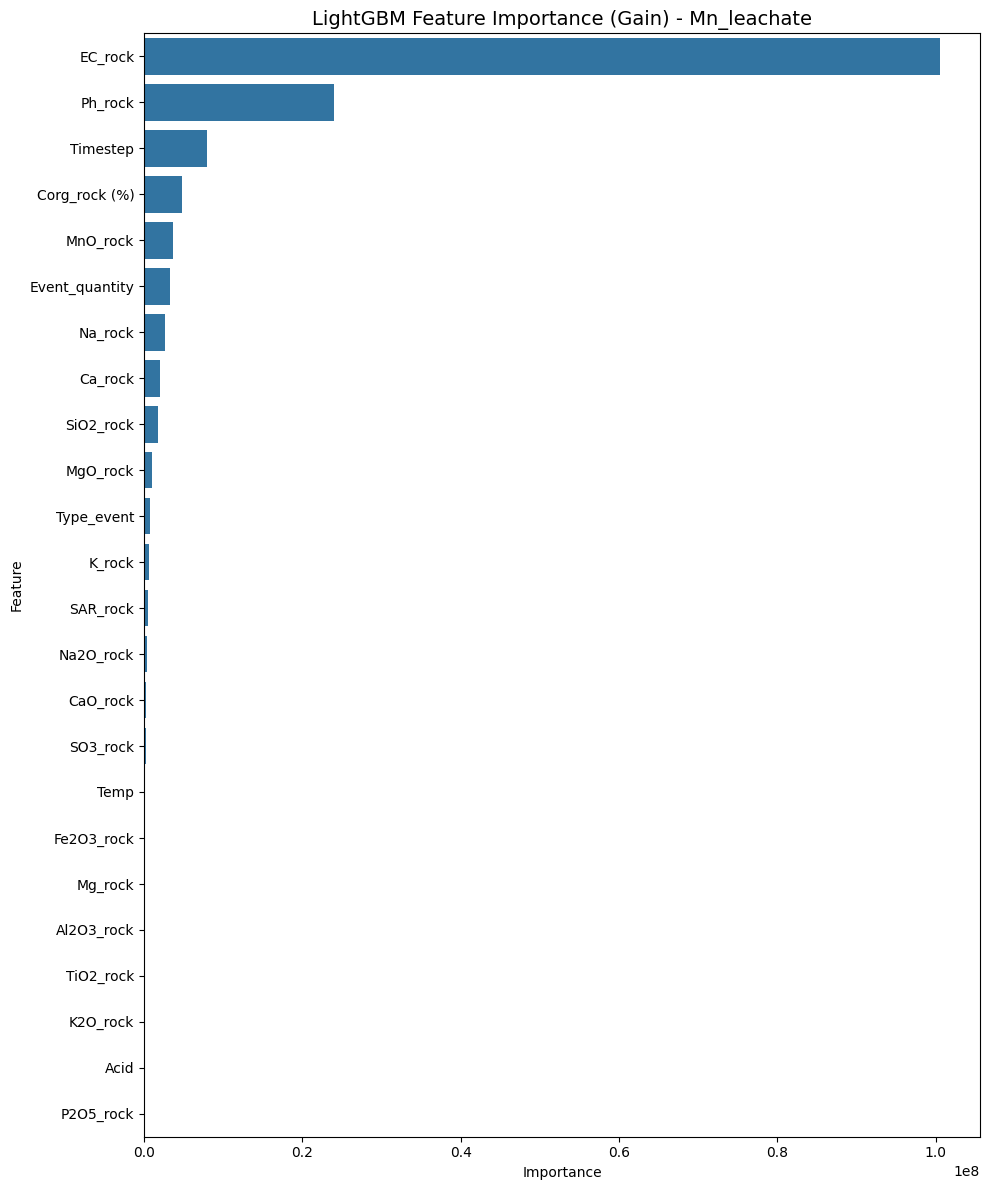

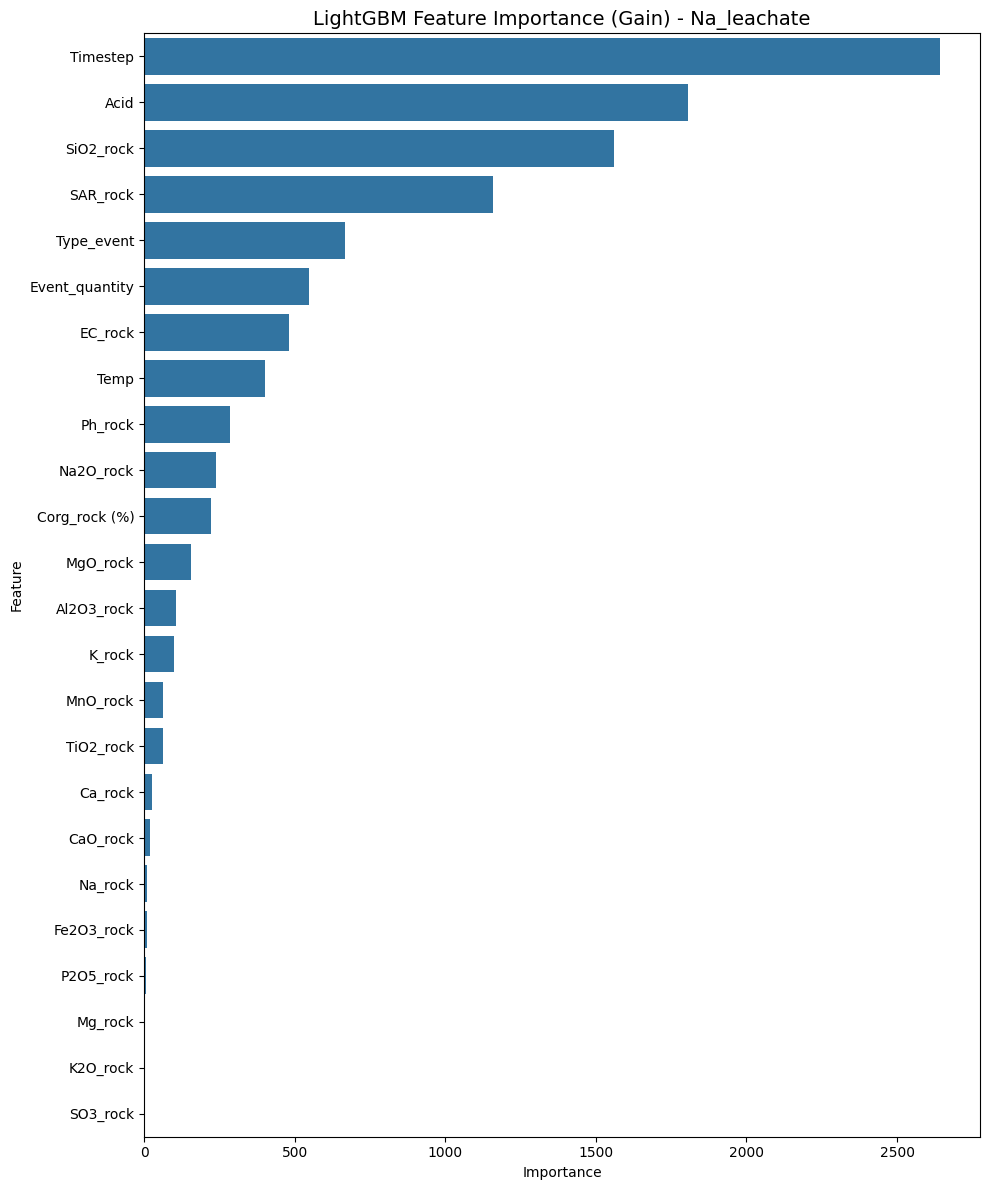

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

for target_col, model in models.items():
    feature_names = X_train.columns

    importance = model.feature_importance(importance_type="gain")

    imp_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values("Importance", ascending=False)

    plt.figure(figsize=(10, 12))
    sns.barplot(data=imp_df, x="Importance", y="Feature")
    plt.title(f"LightGBM Feature Importance (Gain) - {target_col}", fontsize=14)
    plt.tight_layout()
    plt.show()


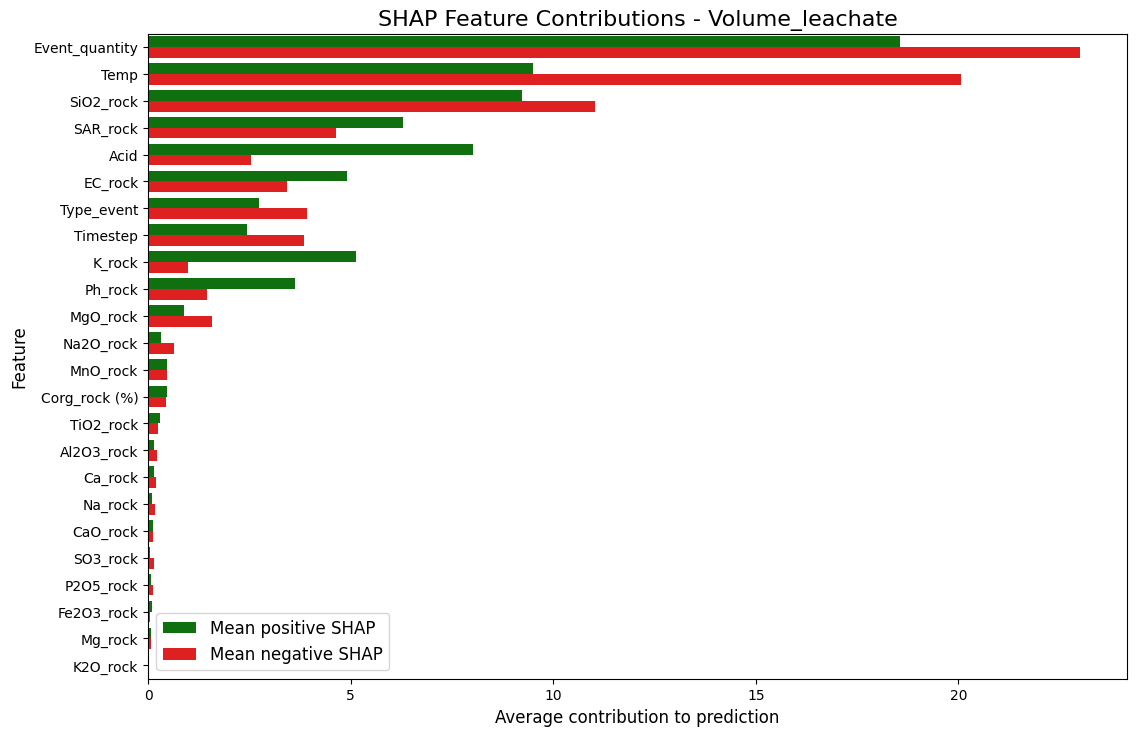

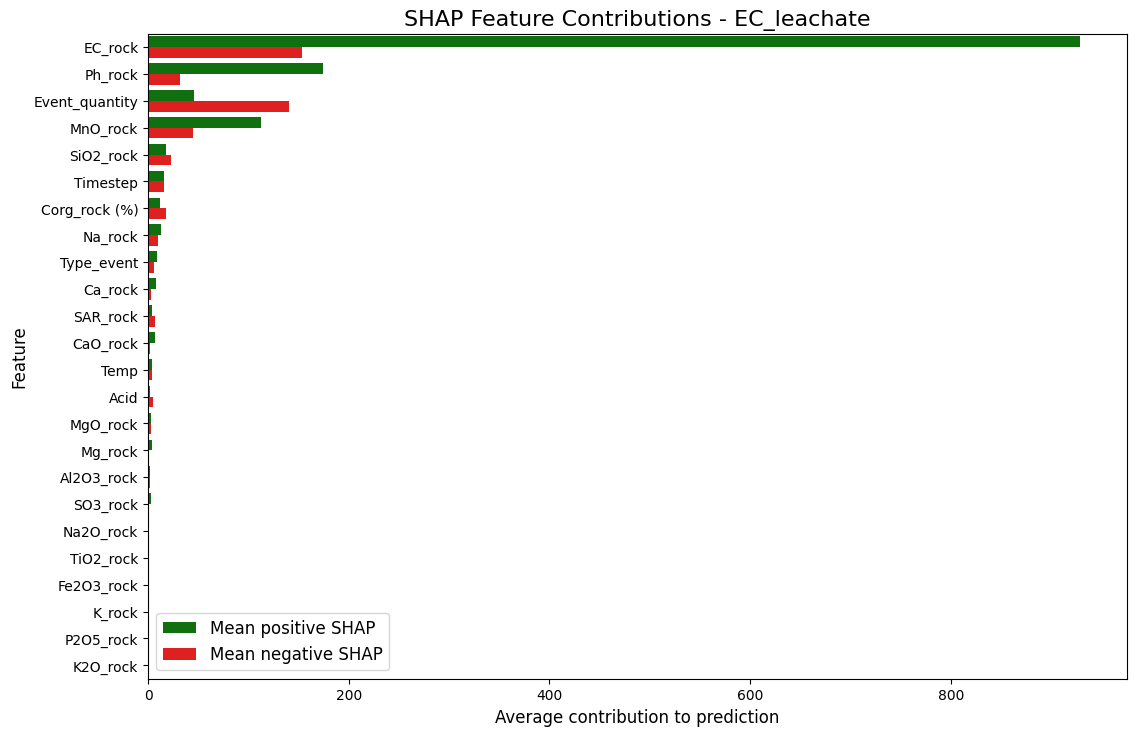

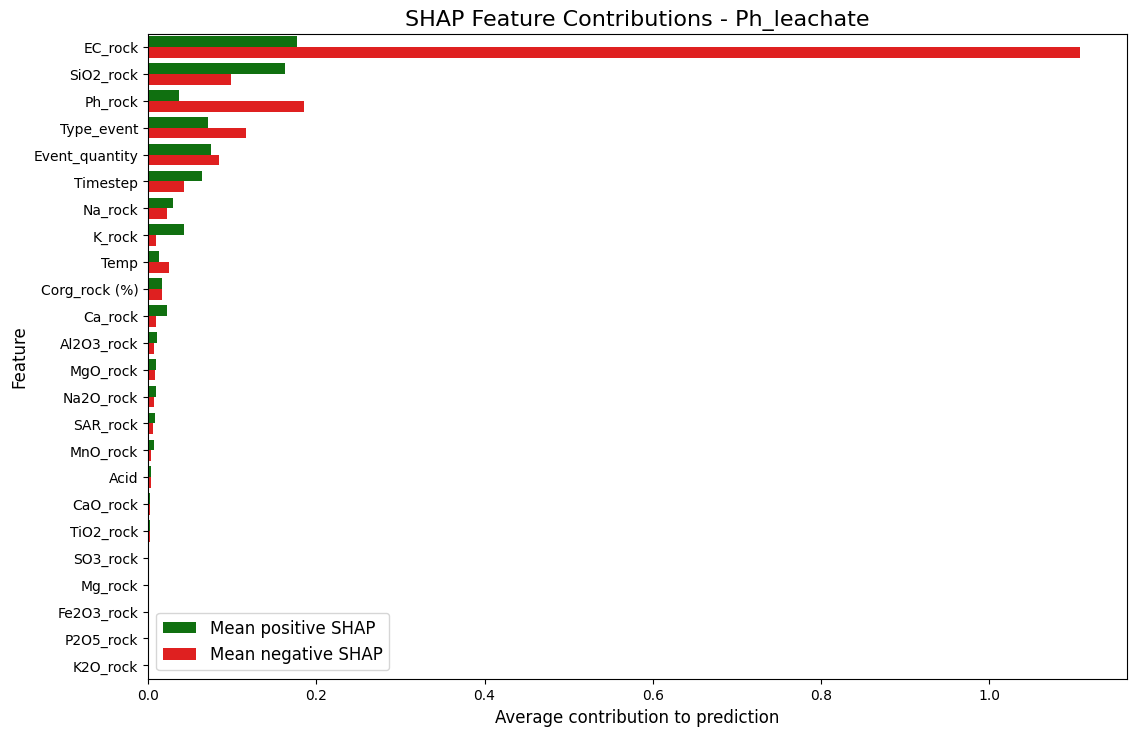

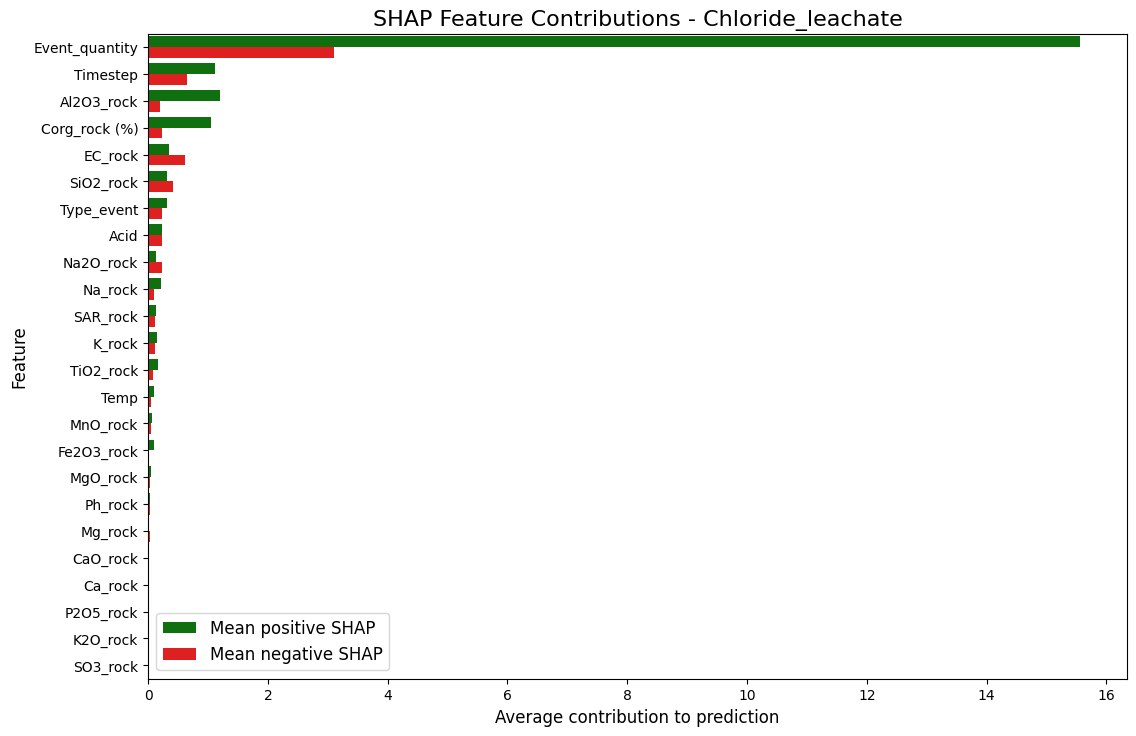

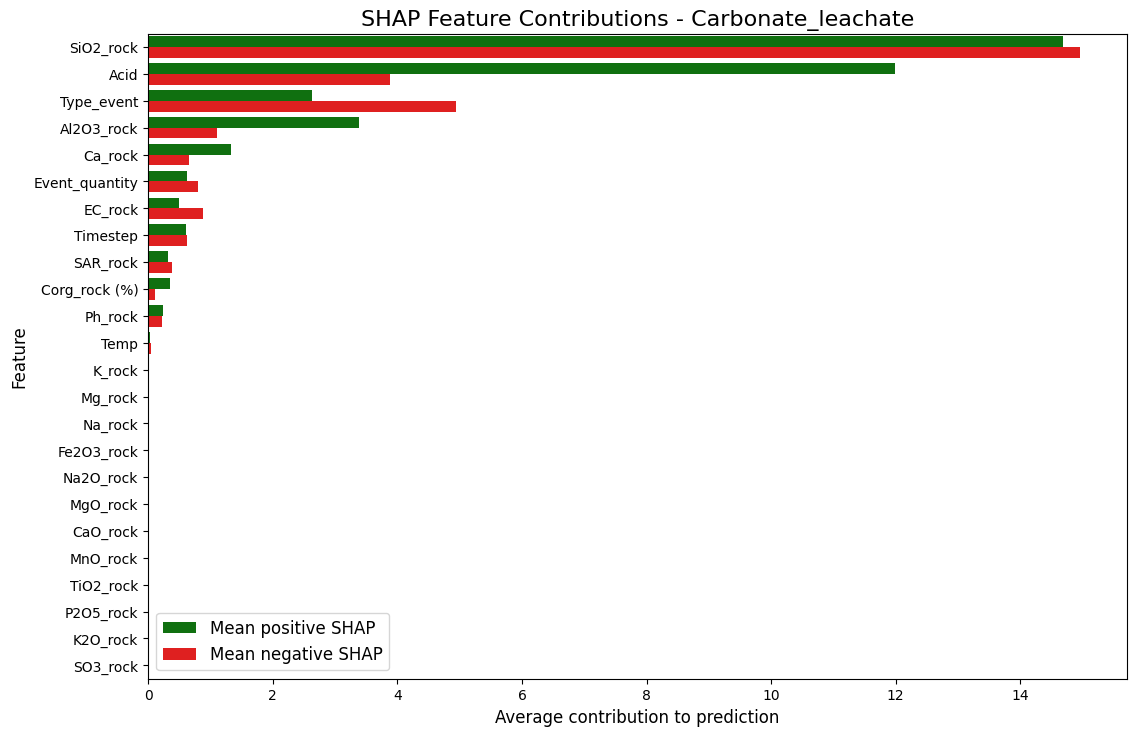

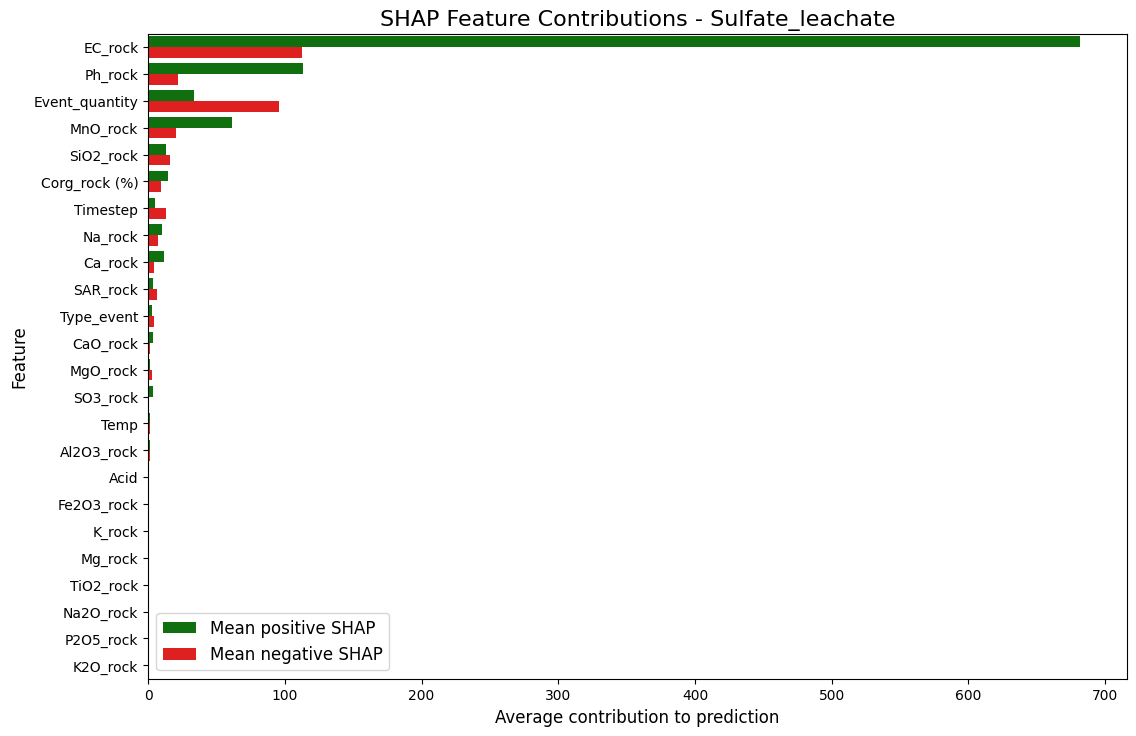

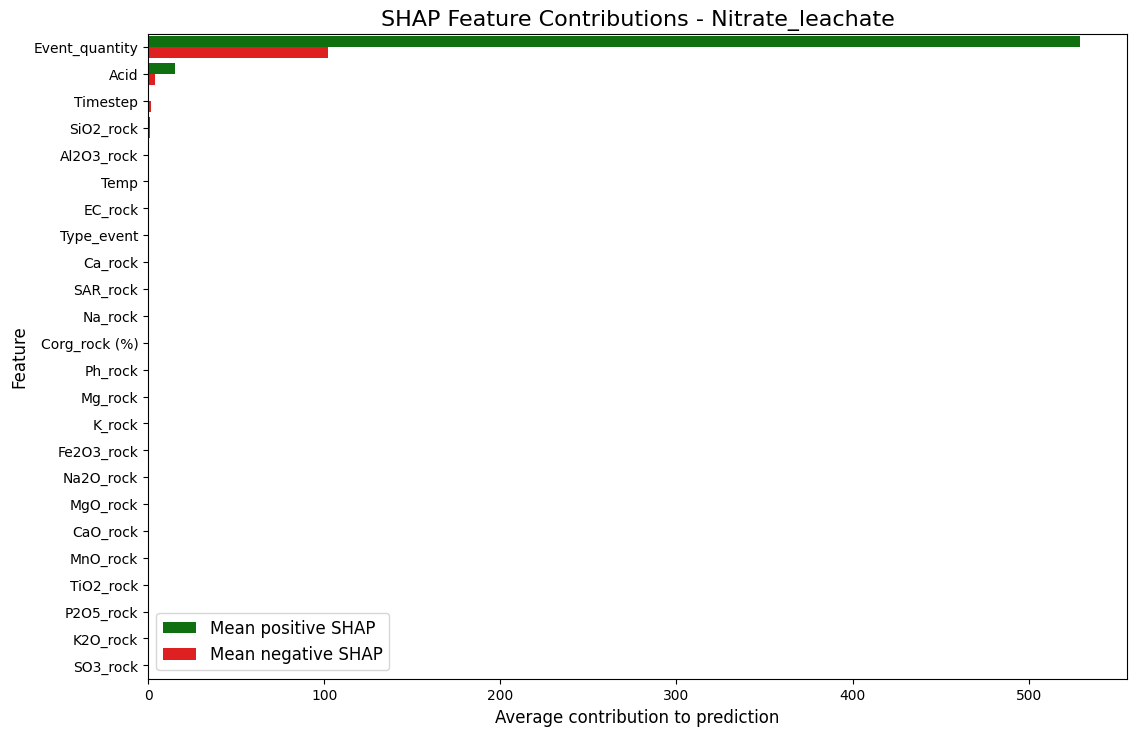

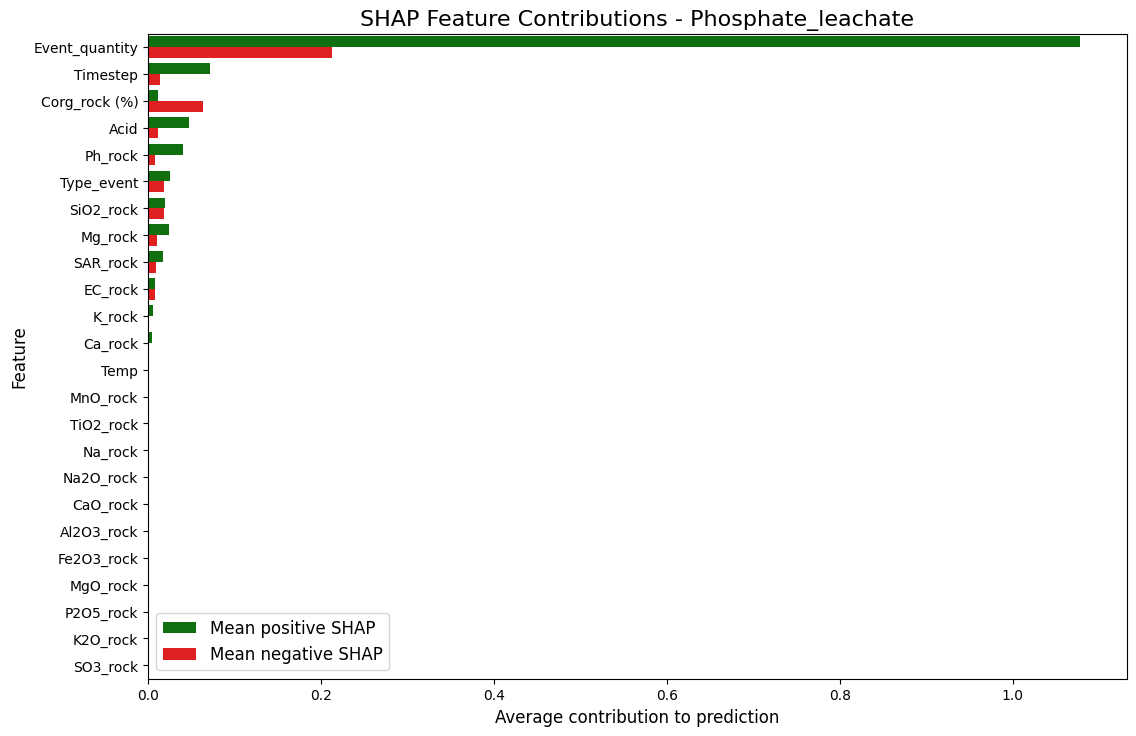

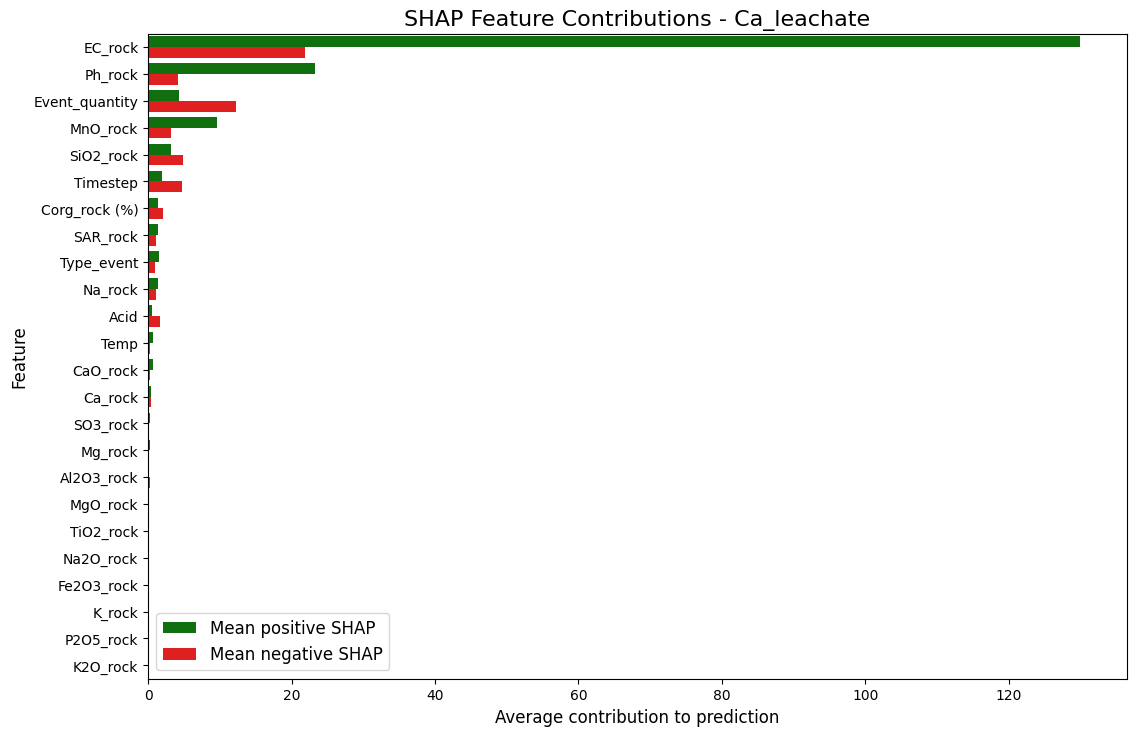

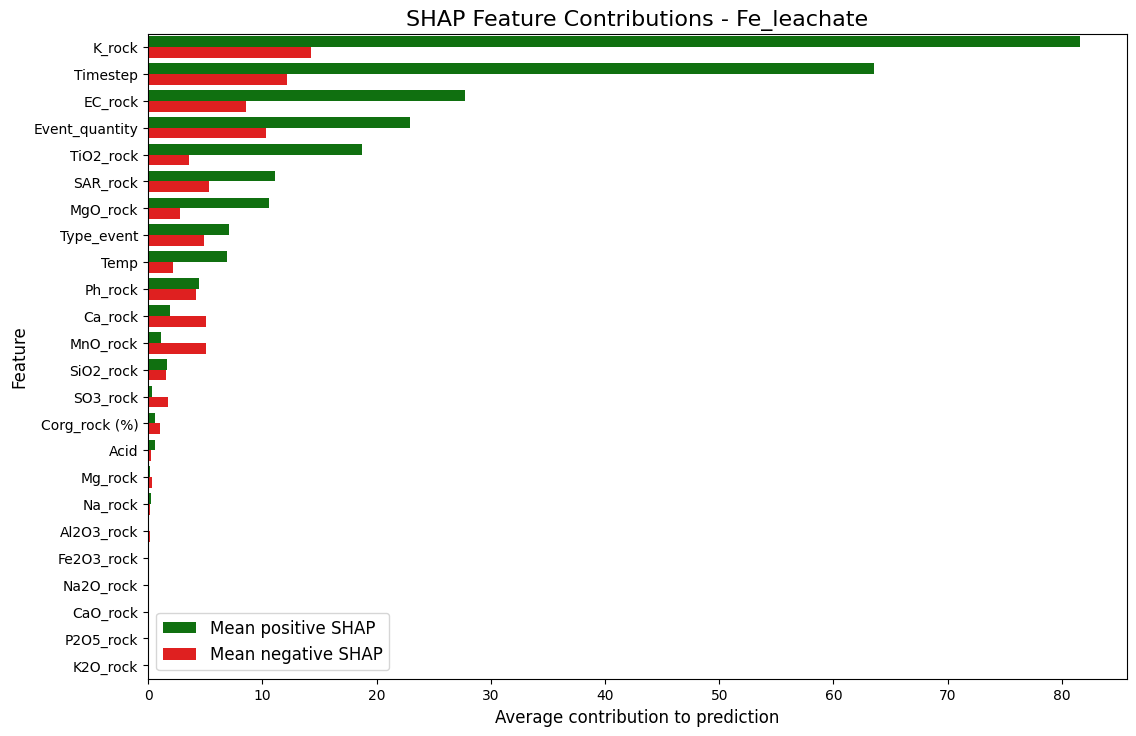

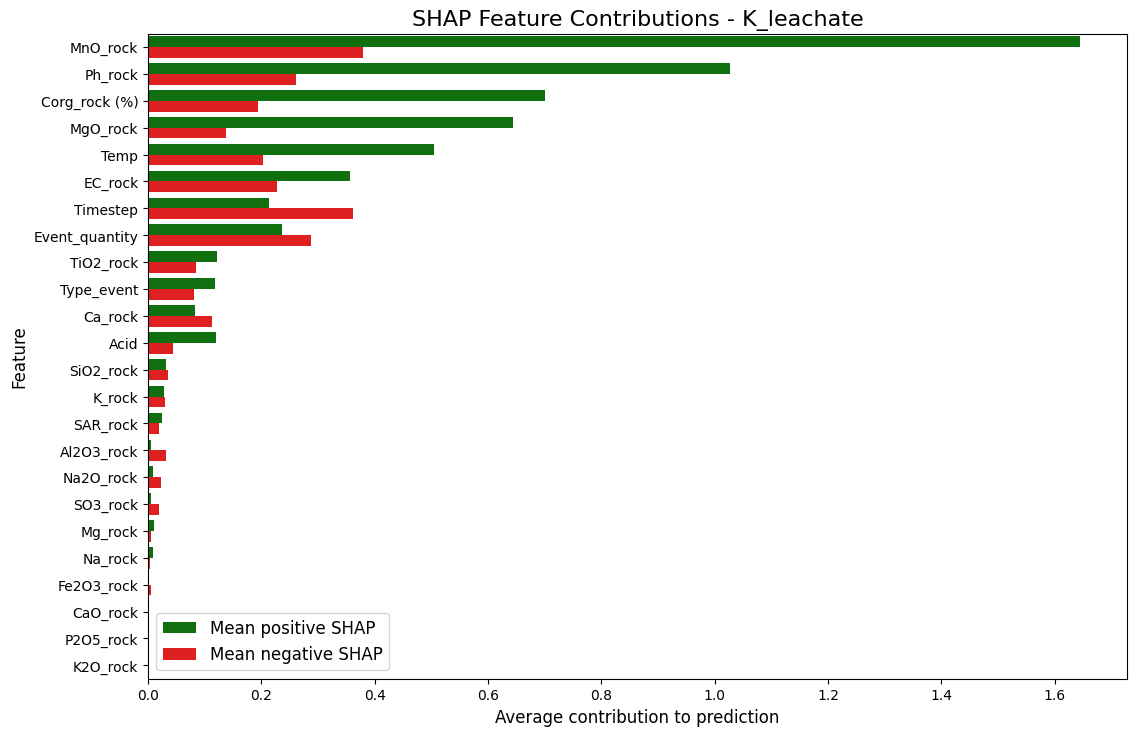

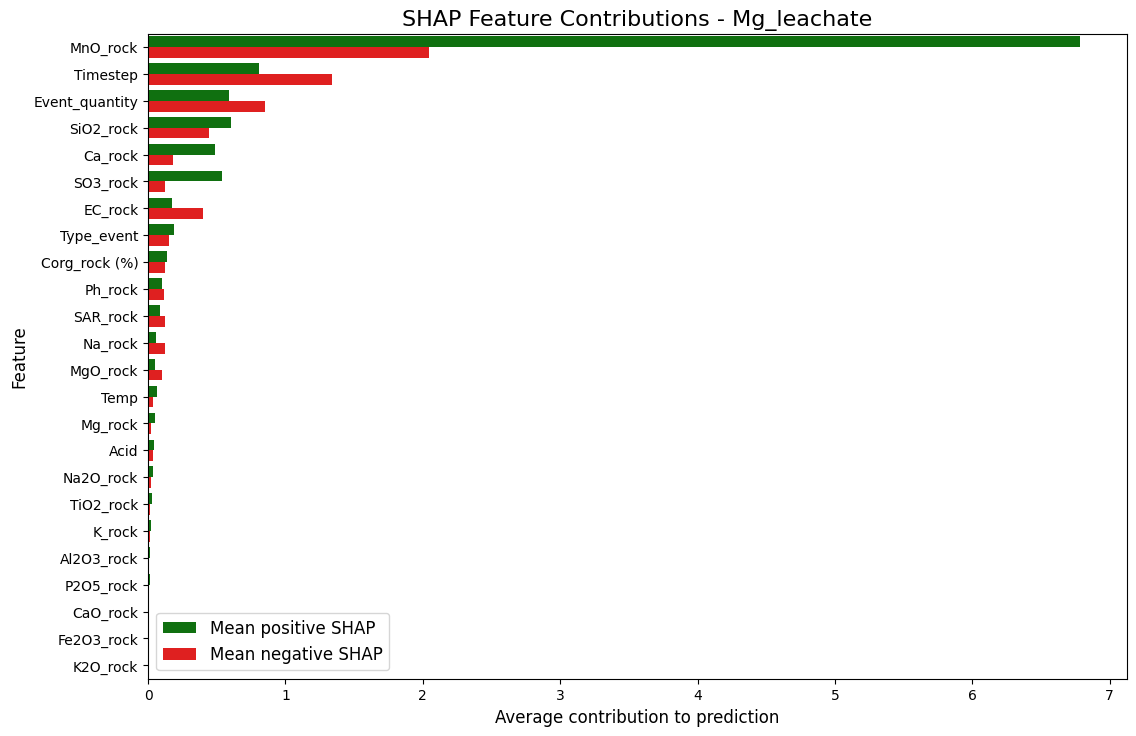

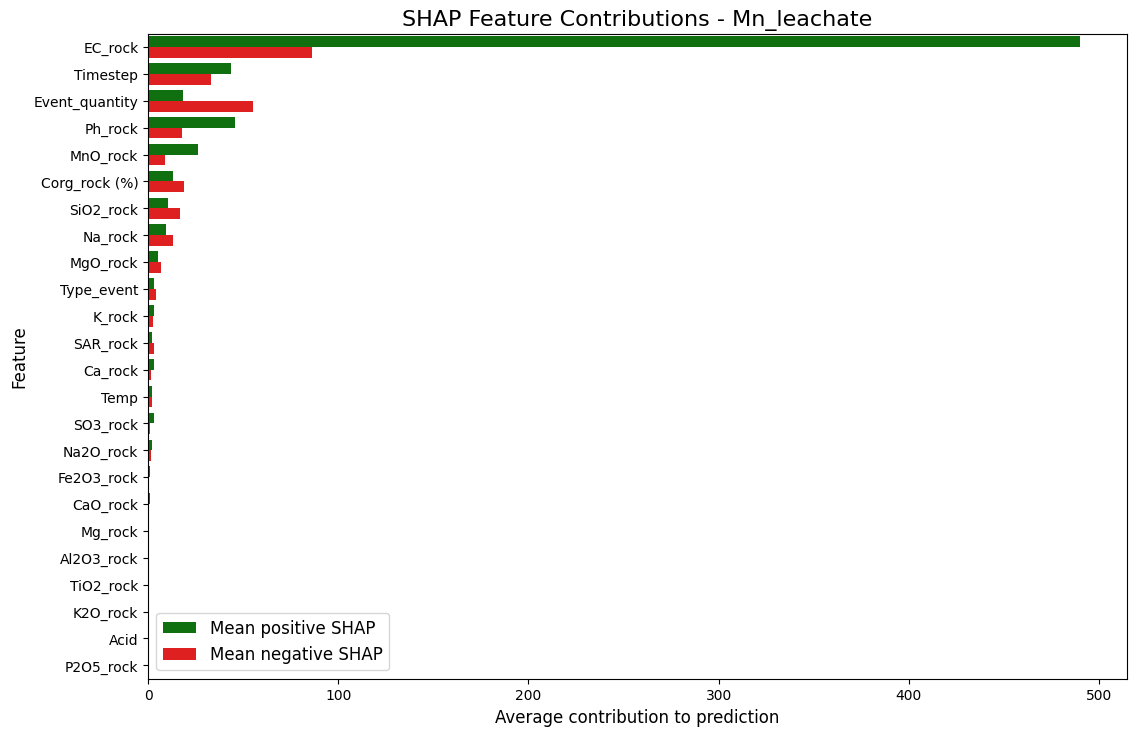

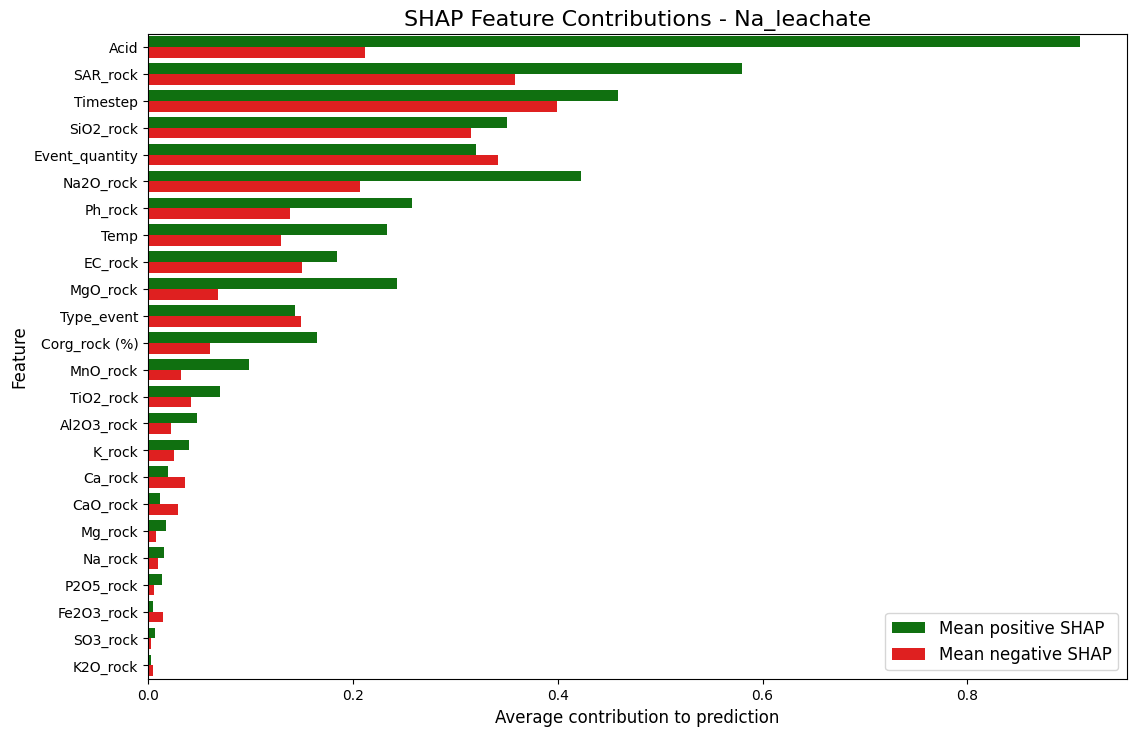

In [22]:
import shap

for target_col, model in models.items():

    mask = ~df[target_col].isna()
    X_target = X[mask]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_target)

    shap_df = pd.DataFrame(shap_values, columns=X_target.columns)
    mean_positive = shap_df[shap_df > 0].mean()
    mean_negative = shap_df[shap_df < 0].mean()

    summary_df = pd.DataFrame({
        "Feature": X_target.columns,
        "Mean positive SHAP": mean_positive,
        "Mean negative SHAP": mean_negative.abs()
    }).fillna(0)

    summary_long = summary_df.melt(
        id_vars="Feature",
        value_vars=["Mean positive SHAP", "Mean negative SHAP"],
        var_name="Contribution",
        value_name="Magnitude"
    )

    feature_order = summary_df.set_index("Feature").sum(axis=1).sort_values(ascending=False).index
    summary_long["Feature"] = pd.Categorical(summary_long["Feature"], categories=feature_order, ordered=True)

    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=summary_long,
        x="Magnitude",
        y="Feature",
        hue="Contribution",
        palette=["green", "red"]
    )
    plt.title(f"SHAP Feature Contributions - {target_col}", fontsize=16)
    plt.xlabel("Average contribution to prediction", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.yticks(fontsize=10)
    plt.legend(title="", fontsize=12)
    plt.tight_layout(pad=3)
    plt.show()



=== Plots for Volume_leachate ===


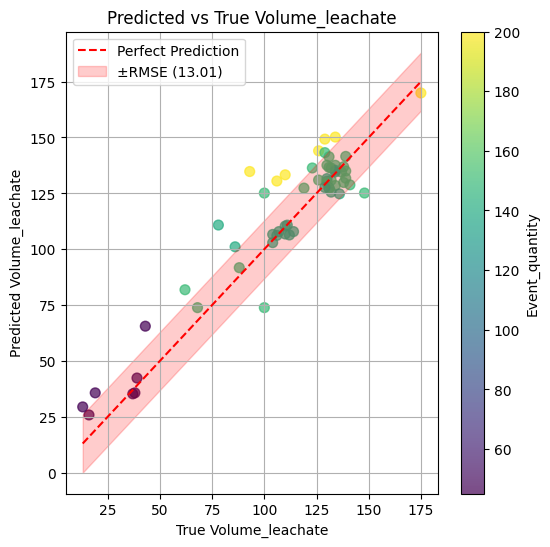


=== Plots for EC_leachate ===


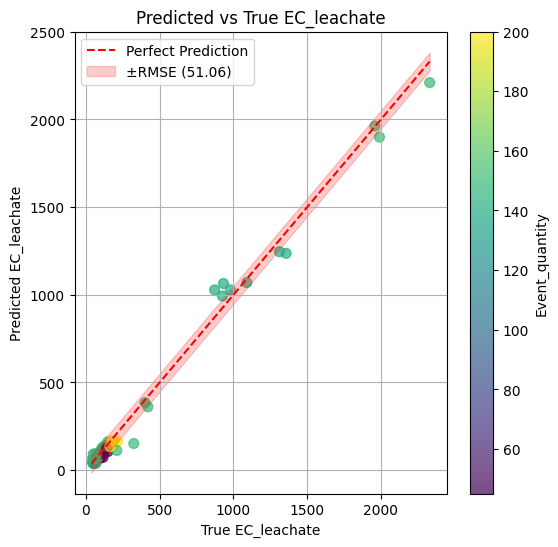


=== Plots for Ph_leachate ===


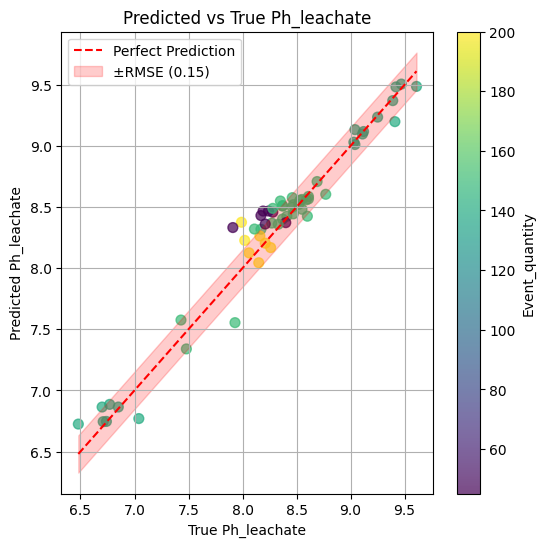


=== Plots for Chloride_leachate ===


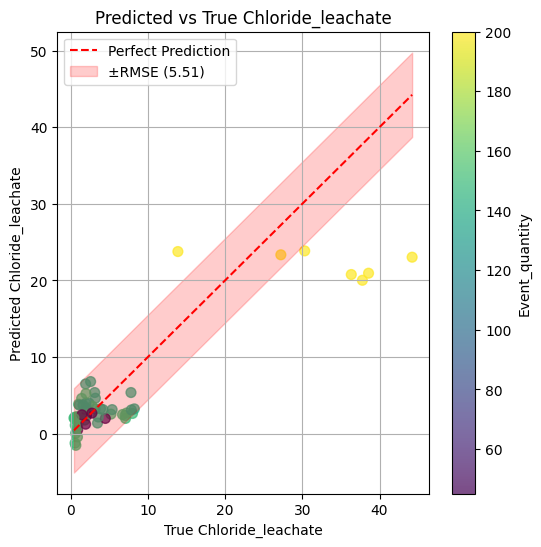


=== Plots for Carbonate_leachate ===


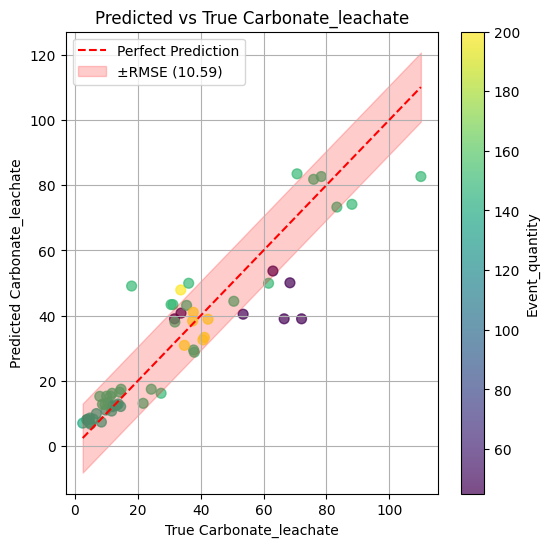


=== Plots for Sulfate_leachate ===


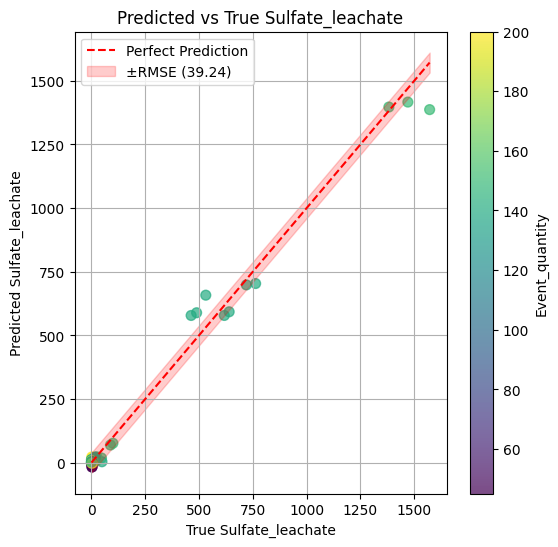


=== Plots for Nitrate_leachate ===


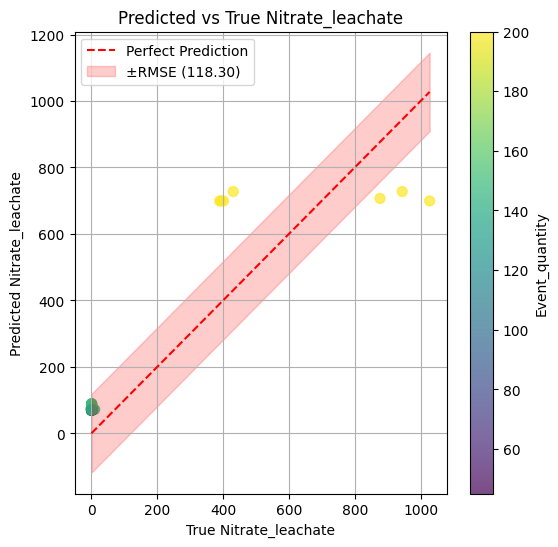


=== Plots for Phosphate_leachate ===


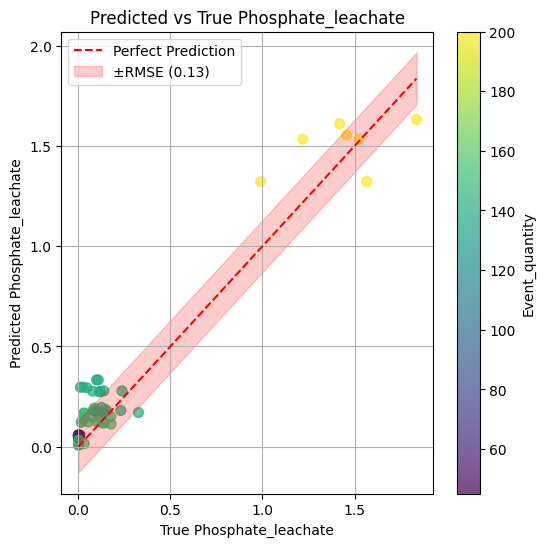


=== Plots for Ca_leachate ===


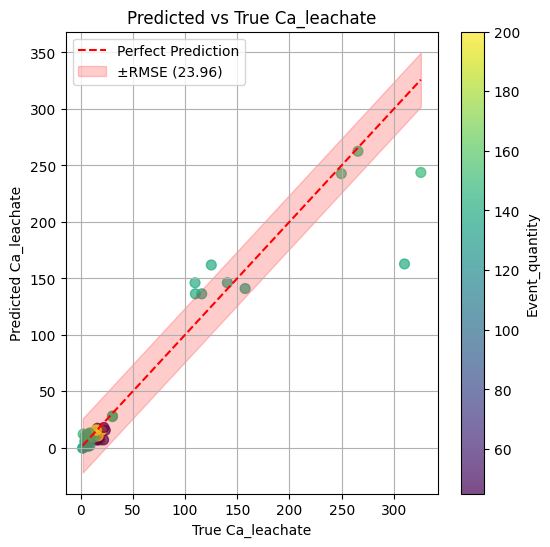


=== Plots for Fe_leachate ===


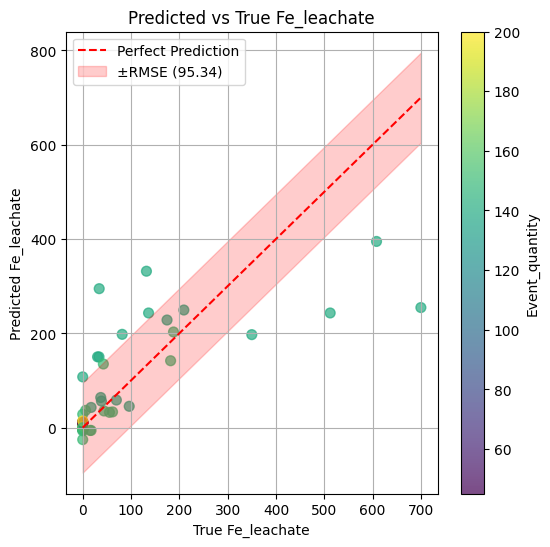


=== Plots for K_leachate ===


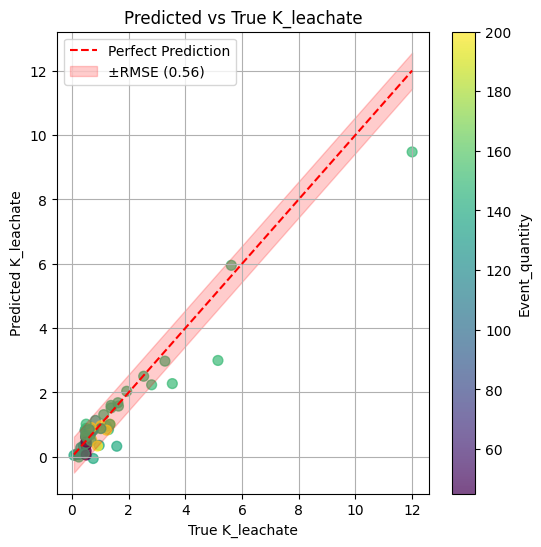


=== Plots for Mg_leachate ===


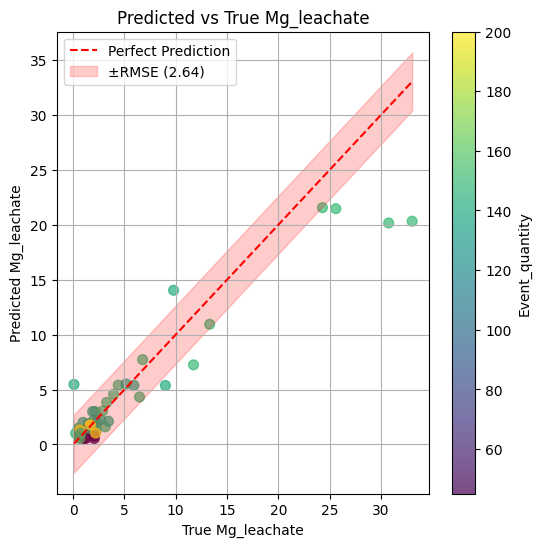


=== Plots for Mn_leachate ===


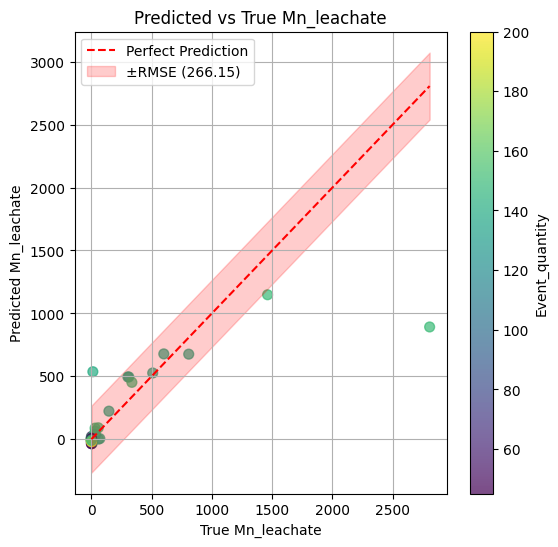


=== Plots for Na_leachate ===


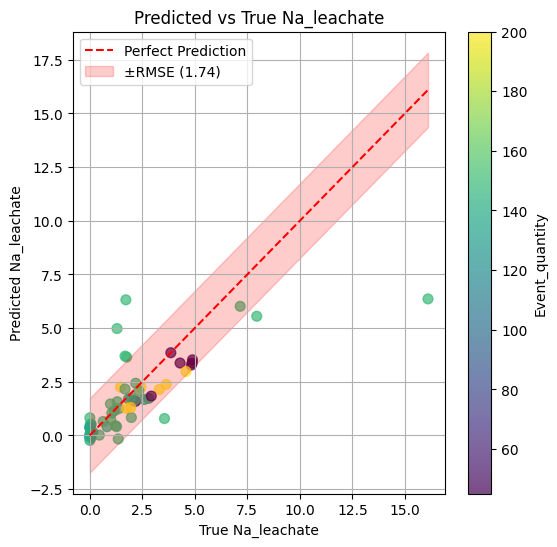

In [23]:
import matplotlib.pyplot as plt
import numpy as np

event_min, event_max = 100, 160

for target_col, model in models.items():
    print(f"\n=== Plot for {target_col} ===")

    X_train, X_val, y_train, y_val = train_test_split(
        X, df[target_col], test_size=0.2, random_state=42
    )

    preds = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, preds))


    plt.figure(figsize=(6,6))
    plt.scatter(y_val, preds, c=X_val["Event_quantity"], cmap="viridis", s=50, alpha=0.7)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
    plt.fill_between(
        [y_val.min(), y_val.max()],
        [y_val.min()-rmse_val, y_val.max()-rmse_val],
        [y_val.min()+rmse_val, y_val.max()+rmse_val],
        color='red', alpha=0.2, label=f'±RMSE ({rmse_val:.2f})'
    )
    plt.xlabel(f"True {target_col}")
    plt.ylabel(f"Predicted {target_col}")
    plt.title(f"Predicted vs True {target_col}")
    plt.colorbar(label="Event_quantity")
    plt.legend()
    plt.grid(True)
    plt.show()


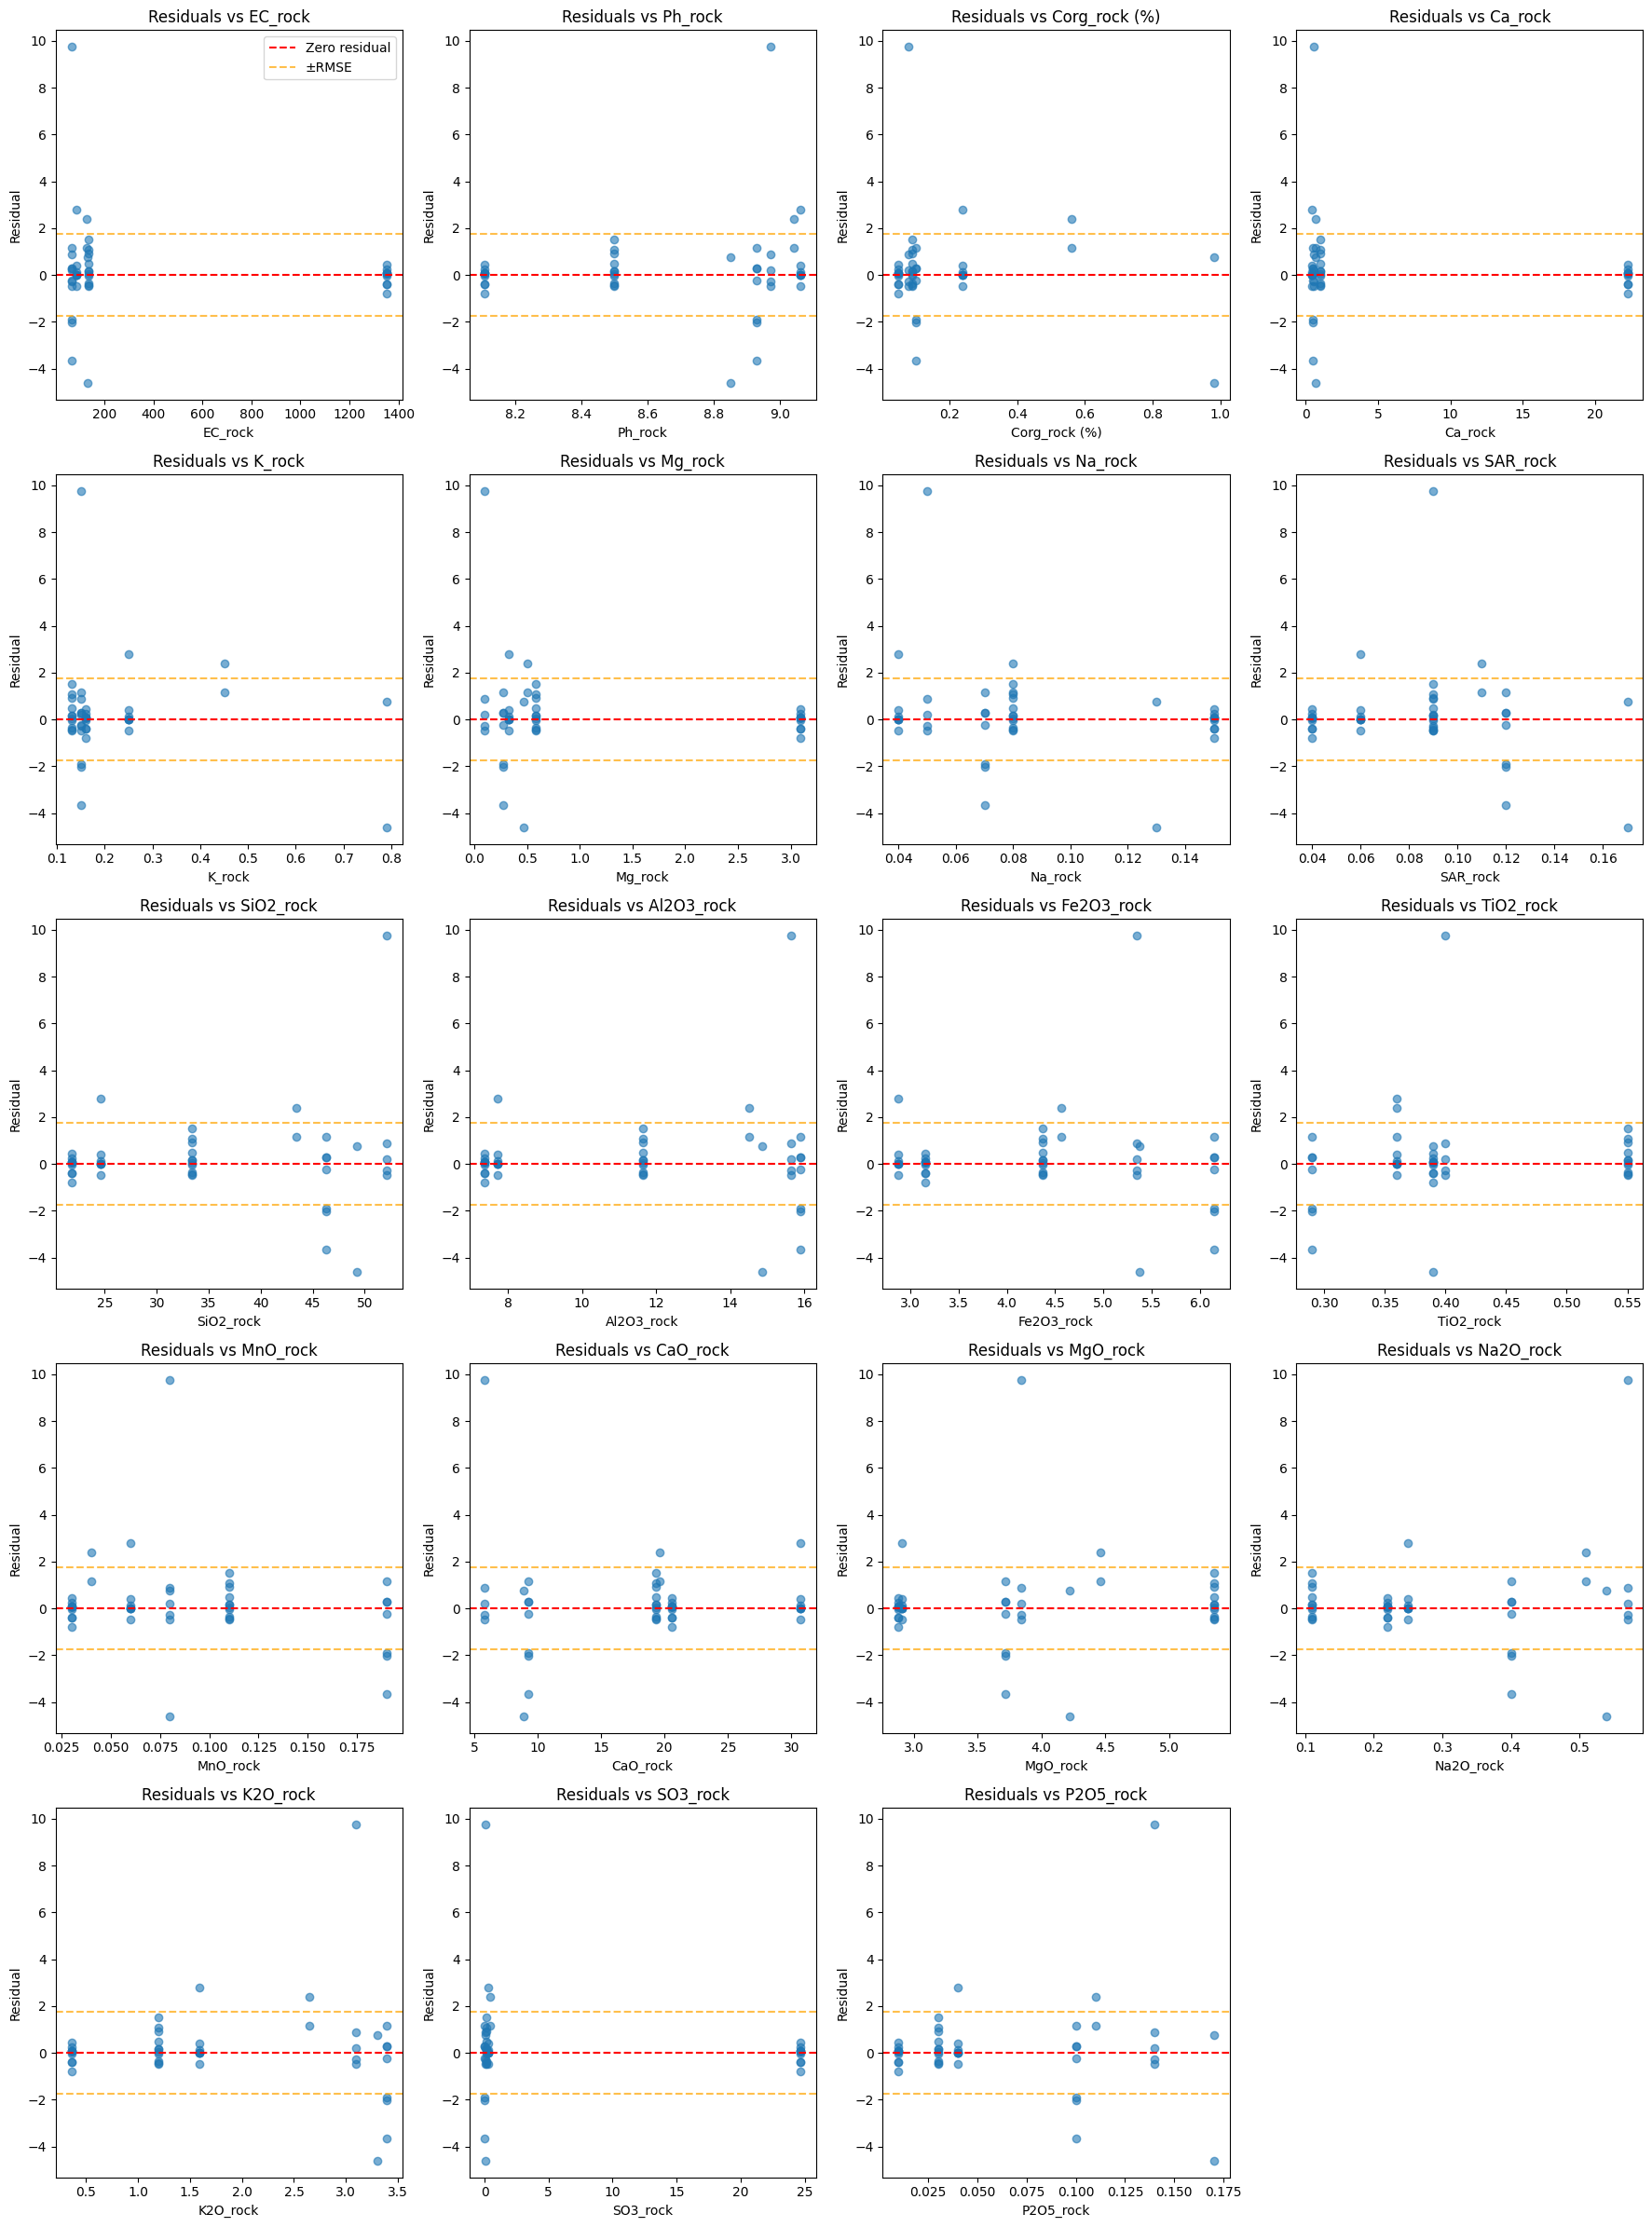

In [24]:
    residuals = y_val - preds
    X_val_copy = X_val.copy()
    X_val_copy["Residual"] = residuals

    mask = (X_val_copy["Event_quantity"] >= event_min) & (X_val_copy["Event_quantity"] <= event_max)
    X_filtered = X_val_copy[mask]
    residuals_filtered = residuals[mask]

    rock_features = [
        "EC_rock", "Ph_rock", "Corg_rock (%)", "Ca_rock", "K_rock", "Mg_rock", "Na_rock",
        "SAR_rock", "SiO2_rock", "Al2O3_rock", "Fe2O3_rock", "TiO2_rock", "MnO_rock",
        "CaO_rock", "MgO_rock", "Na2O_rock", "K2O_rock", "SO3_rock", "P2O5_rock"
    ]

    plt.figure(figsize=(18, 24))
    for i, feature in enumerate(rock_features, 1):
        plt.subplot(5, 4, i)
        plt.scatter(X_filtered[feature], residuals_filtered, alpha=0.6)
        plt.axhline(0, color='r', linestyle='--', label='Zero residual')
        plt.axhline(rmse_val, color='orange', linestyle='--', alpha=0.7, label='±RMSE')
        plt.axhline(-rmse_val, color='orange', linestyle='--', alpha=0.7)
        plt.xlabel(feature)
        plt.ylabel("Residual")
        plt.title(f"Residuals vs {feature}")
        if i == 1:
            plt.legend()

    plt.tight_layout()
    plt.show()